## Importing all the required libraries

In [416]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)
import keras


# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.metrics import confusion_matrix, average_precision_score, classification_report
from sklearn.model_selection import cross_val_predict, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
import xgboost as xgb
from collections import Counter

from sklearn.preprocessing import RobustScaler, MinMaxScaler
from scipy.stats import boxcox 
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import os
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import chi2
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectKBest

## Read the dataset and understand the data

In [417]:
data_frame = pd.read_csv("C:/Users/16674/Desktop/UMBC-MS_CS/First_Sem/Introduction to Machine Learning/Project/framingham.csv")

In [418]:
data_frame.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [419]:
#Shape of dataset

print ('No. of Records :', data_frame.shape[0], '\nNo. of Features : ', data_frame.shape[1])

No. of Records : 4240 
No. of Features :  16


In [420]:
#Let us check datset's attribute info

data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [421]:
data_frame.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Observations :

1. Some the features are Discrete so let us analyze continuous ones
2. Age : We can see that Min. age of subject found in given records is 32 while Max. being 70. So our values are ranging from 32 to 70.
3. cigsPerDay : Subject smoking Cig. per day is as low as nill while we have 70 Cigs. per day making the Peak.
4. totChol : Min. Cholesterol level recorded in our dataset is 107 while Max. is 696.
5. sysBP : Min. Systolic Blood Pressure observed in Subject is 83 while Max. is 295.
6. diaBP : Min. Diastolic Blood Pressure observed in Subject is 48 while Max. is 142.
7. BMI : Body Mass Index in our dataset ranges from 15.54 to 56.
8. heartRate : Observed Heartrate in our case study is 44 to 143.
9. glucose : Glucose sugar level range is 40 to 394.

In [422]:
#Examining Null values in each feature

data_frame.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

## Handle missing data from the dataset by using median

In [423]:
#User defined function for missing value imputation

def impute_median(data):
    return data.fillna(data.median())

In [424]:
#median imputation

data_frame.glucose = data_frame['glucose'].transform(impute_median)
data_frame.education = data_frame['education'].transform(impute_median)
data_frame.heartRate = data_frame['heartRate'].transform(impute_median)
data_frame.totChol = data_frame['totChol'].transform(impute_median)
data_frame.BPMeds = data_frame['BPMeds'].transform(impute_median)

## group by classes that are in relation with other classes

by_currentSmoker = data_frame.groupby(['currentSmoker'])
data_frame.cigsPerDay = by_currentSmoker['cigsPerDay'].transform(impute_median)

by_age = data_frame.groupby(['male','age'])
data_frame.BMI = by_age['BMI'].transform(impute_median)

In [425]:
data_frame = data_frame.dropna(how = 'any', axis = 0)
print(data_frame.shape)
data_frame.head()

(4240, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [426]:
#Rechecking if we have any missing value left

data_frame.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [427]:
#Shape of dataset

print ('No. of Records :', data_frame.shape[0], '\nNo. of Features : ', data_frame.shape[1])

No. of Records : 4240 
No. of Features :  16


In [428]:
print('Gender')
print(data_frame['male'].value_counts(normalize = True))
print('----')
print('\n')

print('Education')
print(data_frame['education'].value_counts(normalize = True))
print('----')
print('\n')

print('BP Medication')
print(data_frame['BPMeds'].value_counts(normalize = True))
print('----')
print('\n')

print('Stroke')
print(data_frame['prevalentStroke'].value_counts(normalize = True))
print('----')
print('\n')

print('Hypertension')
print(data_frame['prevalentHyp'].value_counts(normalize = True))
print('----')
print('\n')

print('Diabetes')
print(data_frame['diabetes'].value_counts(normalize = True))
print('----')
print('\n')

Gender
0    0.570755
1    0.429245
Name: male, dtype: float64
----


Education
1.0    0.405660
2.0    0.320283
3.0    0.162500
4.0    0.111557
Name: education, dtype: float64
----


BP Medication
0.0    0.970755
1.0    0.029245
Name: BPMeds, dtype: float64
----


Stroke
0    0.994104
1    0.005896
Name: prevalentStroke, dtype: float64
----


Hypertension
0    0.689387
1    0.310613
Name: prevalentHyp, dtype: float64
----


Diabetes
0    0.974292
1    0.025708
Name: diabetes, dtype: float64
----




## Conclusion drawn from above operation-
1. Assuming that 0 is female and 1 is male - 57% is Female, 42% is Male
2. Most of the patients in the database (60%+) is below education level 2 and lower
3. 97% of the patients are not on BP Medication
4. 99% have not had a Stroke before
5. About 69% are not Hypertension patients and 31% are
6. 97% users are not diabetic

In [429]:
disease = data_frame.groupby('TenYearCHD')

print('Gender')
print(disease['male'].value_counts(normalize = True))
print('----')
print('\n')

print('Education')
print(disease['education'].value_counts(normalize = True))
print('----')
print('\n')

print('BP Medication')
print(disease['BPMeds'].value_counts(normalize = True))
print('----')
print('\n')

print('Stroke')
print(disease['prevalentStroke'].value_counts(normalize = True))
print('----')
print('\n')

print('Hypertension')
print(disease['prevalentHyp'].value_counts(normalize = True))
print('----')
print('\n')

print('Diabetes')
print(disease['diabetes'].value_counts(normalize = True))
print('----')
print('\n')

Gender
TenYearCHD  male
0           0       0.589266
            1       0.410734
1           1       0.532609
            0       0.467391
Name: male, dtype: float64
----


Education
TenYearCHD  education
0           1.0          0.388487
            2.0          0.332314
            3.0          0.167130
            4.0          0.112069
1           1.0          0.501553
            2.0          0.253106
            3.0          0.136646
            4.0          0.108696
Name: education, dtype: float64
----


BP Medication
TenYearCHD  BPMeds
0           0.0       0.976919
            1.0       0.023081
1           0.0       0.936335
            1.0       0.063665
Name: BPMeds, dtype: float64
----


Stroke
TenYearCHD  prevalentStroke
0           0                  0.996107
            1                  0.003893
1           0                  0.982919
            1                  0.017081
Name: prevalentStroke, dtype: float64
----


Hypertension
TenYearCHD  prevalentHyp
0           

## Conclusion-
1. Males seem to be slightly susceptible to Heart Disease compared to Females. (Basicaly Gender may play a role)
2. While it looks like lower education level patients are more susceptible, the overall number of lower education level patients are also much higher
3. BP Medication, Stroke and Diabetes dont seem to have too much of an impact
4. Hypertension, however, seems like it has an impact.

In [430]:
data_frame['totChol'].max()

696.0

In [431]:
data_frame['sysBP'].max()


295.0

In [432]:
data_frame = data_frame[data_frame['totChol']<600.0]
data_frame = data_frame[data_frame['sysBP']<295.0]
data_frame.shape

(4237, 16)

<AxesSubplot: >

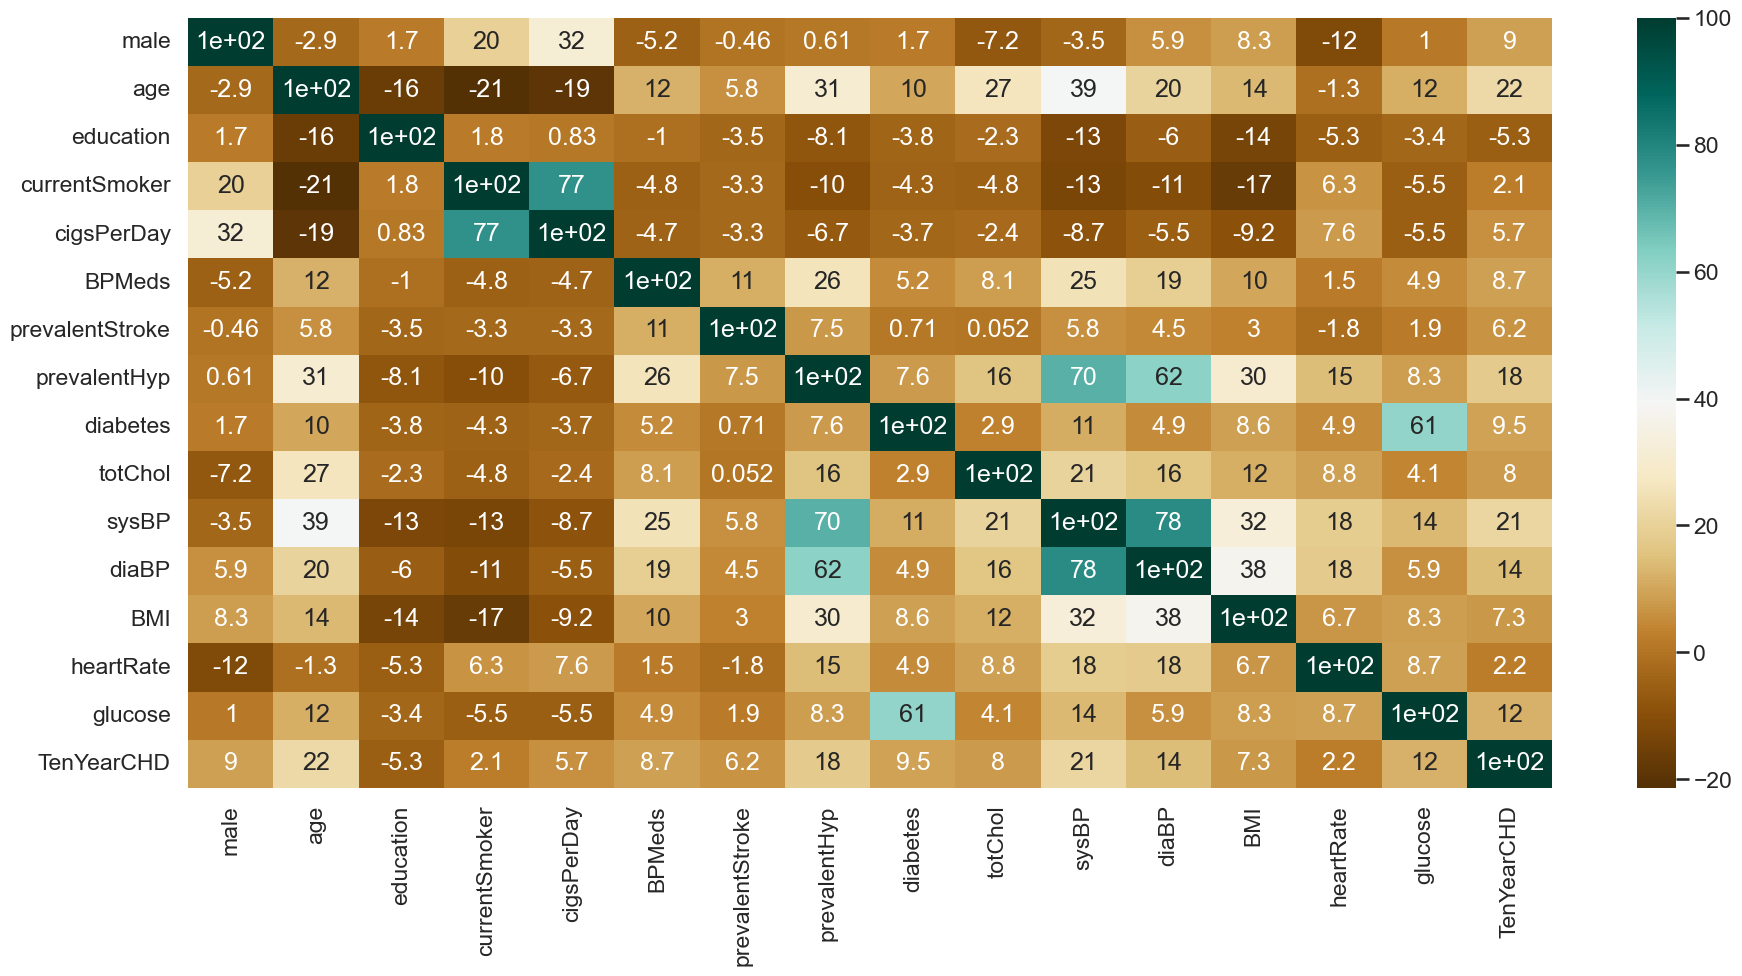

In [433]:
sns.set_context('talk')
plt.figure(figsize=(22,10))
sns.heatmap(data_frame.corr()*100, annot=True, cmap='BrBG')

There seems to be a decently strong correlation between sysBP and diaBP as well as there is negative corelation between education and output variable. Hence we will remove this column later

In [434]:
categorical_features = ['male','currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
for feature in categorical_features:
    print(feature,':')
    print(data_frame[feature].value_counts())
    print("-----------------")

male :
0    2418
1    1819
Name: male, dtype: int64
-----------------
currentSmoker :
0    2143
1    2094
Name: currentSmoker, dtype: int64
-----------------
BPMeds :
0.0    4113
1.0     124
Name: BPMeds, dtype: int64
-----------------
prevalentStroke :
0    4212
1      25
Name: prevalentStroke, dtype: int64
-----------------
prevalentHyp :
0    2923
1    1314
Name: prevalentHyp, dtype: int64
-----------------
diabetes :
0    4129
1     108
Name: diabetes, dtype: int64
-----------------


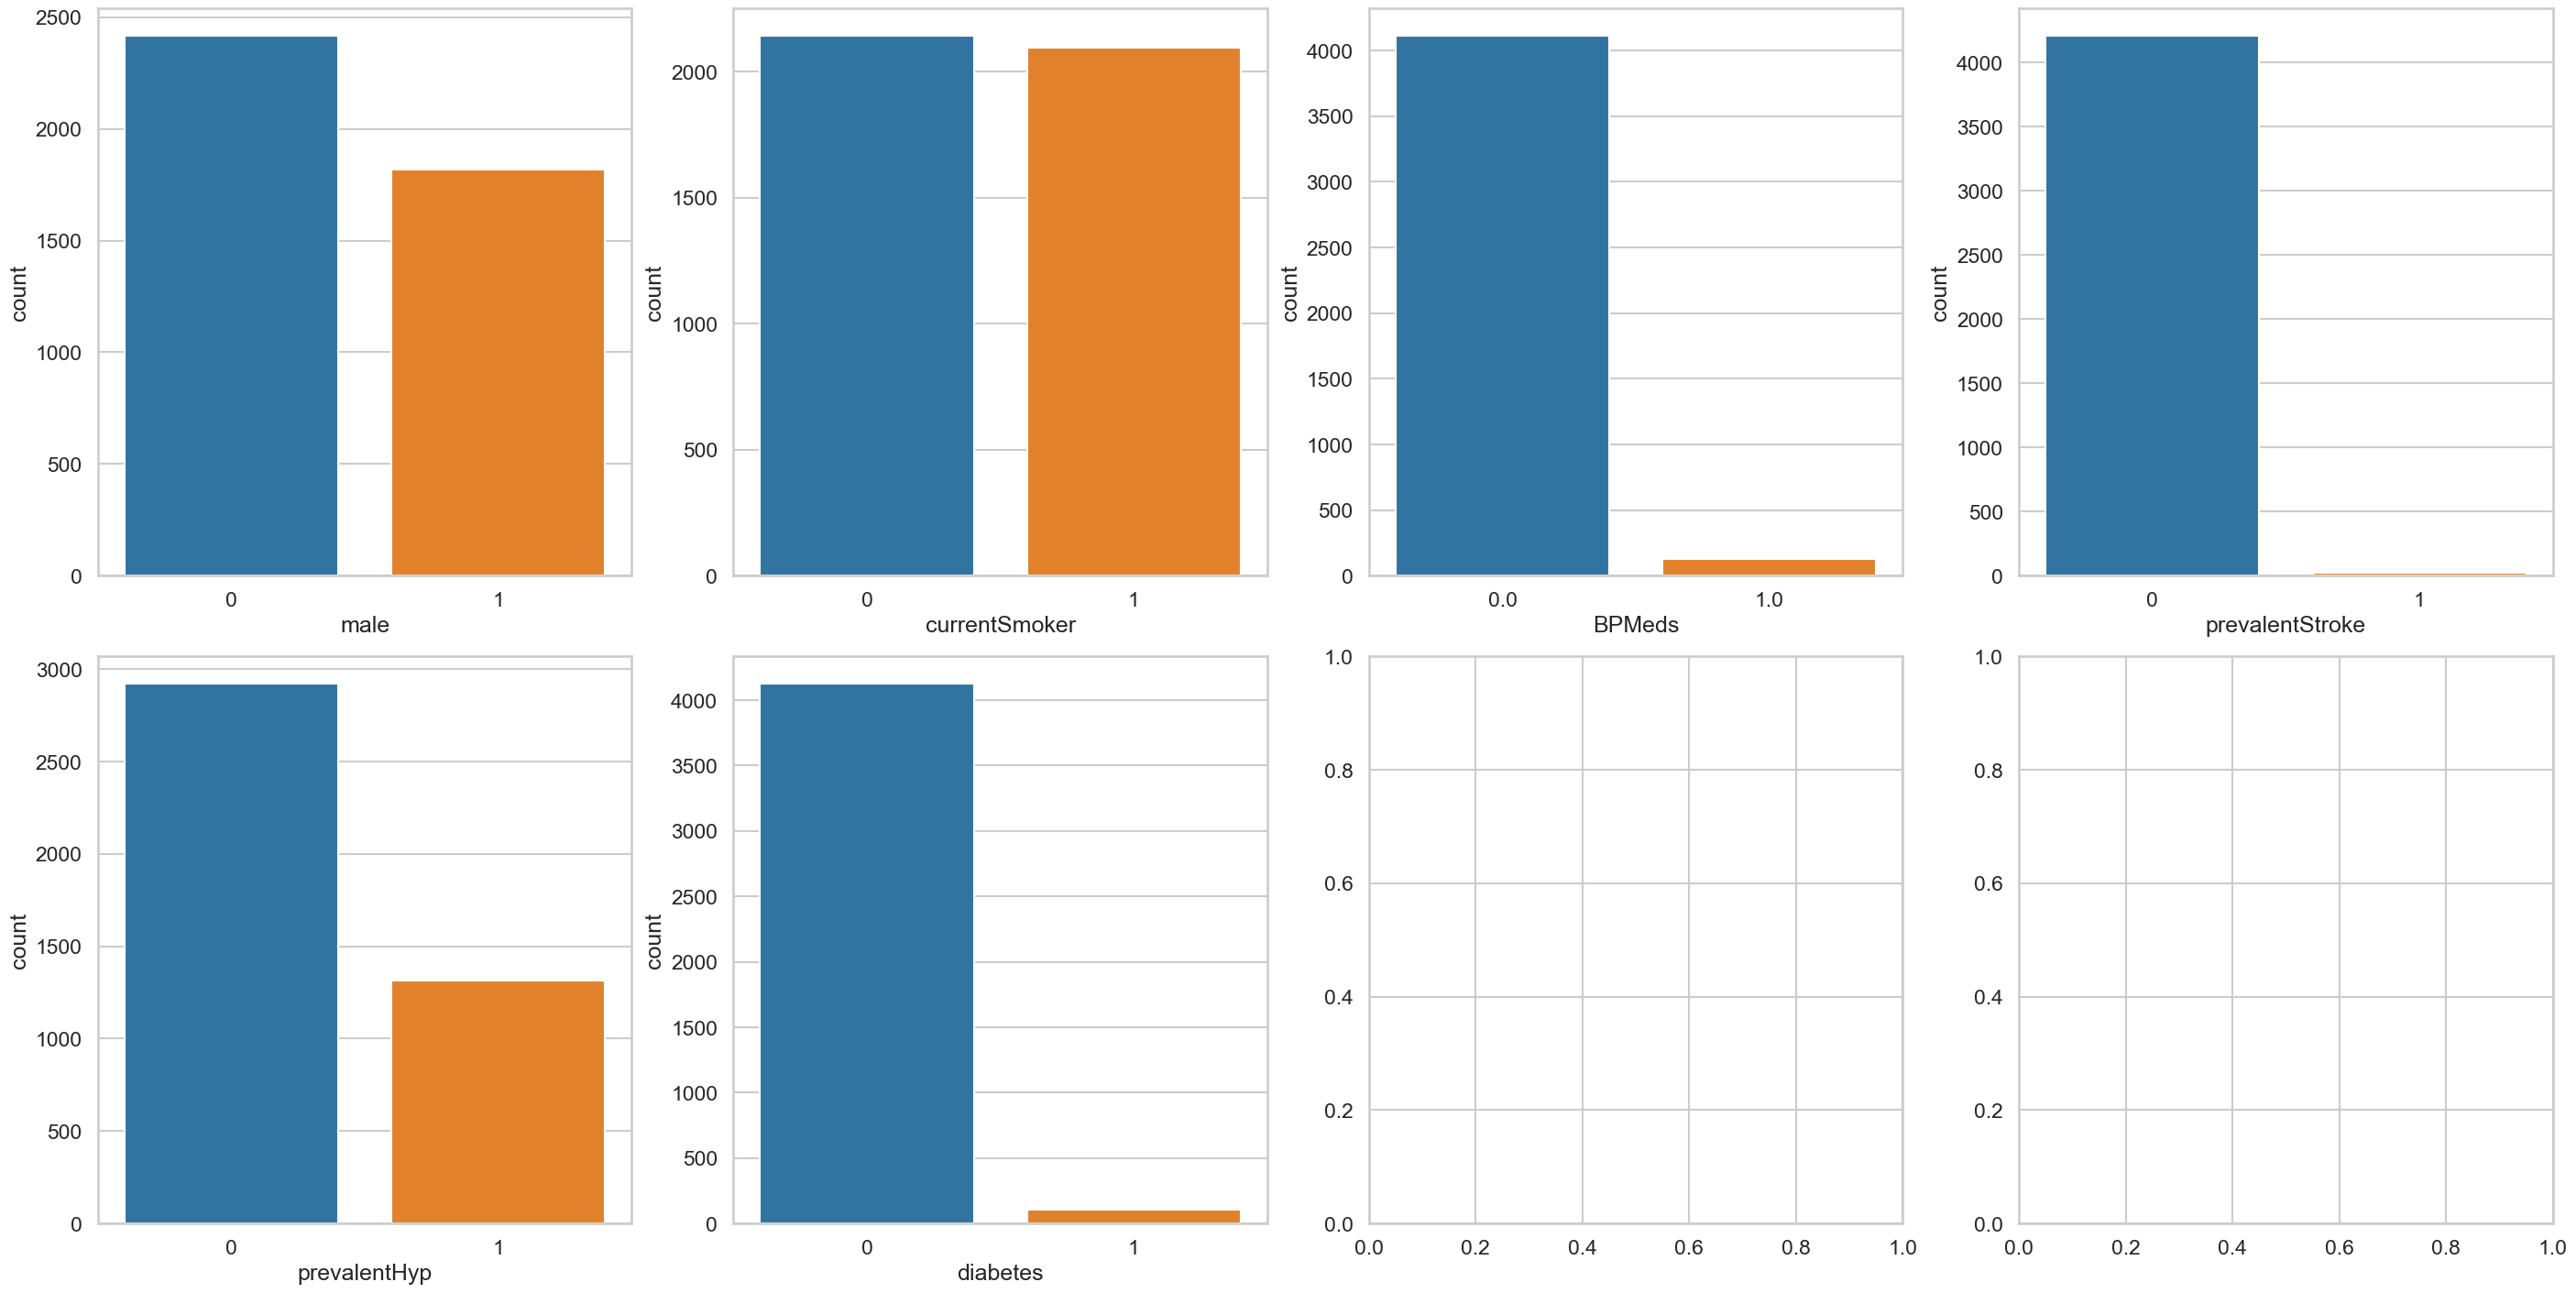

In [435]:
num_plots = len(categorical_features)
total_cols = 4
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=data_frame, ax=axs[row][pos])

## Among the categorical features:

BPmeds, prevalentStroke and diabetes are highly imbalanced.
There are four levels of education whereas the rest categorical features are all binary
The number of Smokers and non-Smokers in currentSmoker is almost the same

Text(0.5, 1.0, 'CHD by Gender')

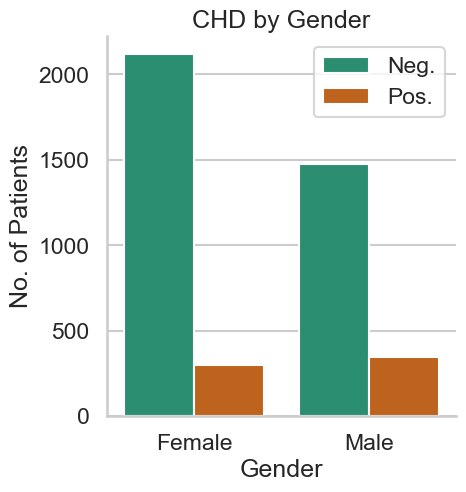

In [436]:
#CHD by Gender Viz.
sns.catplot(x='male', hue='TenYearCHD', data=data_frame, kind='count', palette='Dark2', legend=False)
plt.xlabel('Gender')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('CHD by Gender')

Observations :

1. Above Bivariate Analysis plot depicts Gender wise absence / presence of Chronic Heart Disease (CHD).
2. Observations tells us that we've Excessive number of people who are not suffering from CHD.
3. Negative : Approx. 80 to 90% of Females are falling in Negative Category while Approx. 60 to 70% of Males are in Negative Slot.
4. Positive : While Approx. 10% of Females & Males are suffering from CHD.
5. By this we can say that our Dataset is Imbalanced where Approx. 80 to 90% are Negative Classifications and Approx. 10 to 15% are Positive Classes.

array([[<AxesSubplot: title={'center': 'male'}>,
        <AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'education'}>,
        <AxesSubplot: title={'center': 'currentSmoker'}>],
       [<AxesSubplot: title={'center': 'cigsPerDay'}>,
        <AxesSubplot: title={'center': 'BPMeds'}>,
        <AxesSubplot: title={'center': 'prevalentStroke'}>,
        <AxesSubplot: title={'center': 'prevalentHyp'}>],
       [<AxesSubplot: title={'center': 'diabetes'}>,
        <AxesSubplot: title={'center': 'totChol'}>,
        <AxesSubplot: title={'center': 'sysBP'}>,
        <AxesSubplot: title={'center': 'diaBP'}>],
       [<AxesSubplot: title={'center': 'BMI'}>,
        <AxesSubplot: title={'center': 'heartRate'}>,
        <AxesSubplot: title={'center': 'glucose'}>,
        <AxesSubplot: title={'center': 'TenYearCHD'}>]], dtype=object)

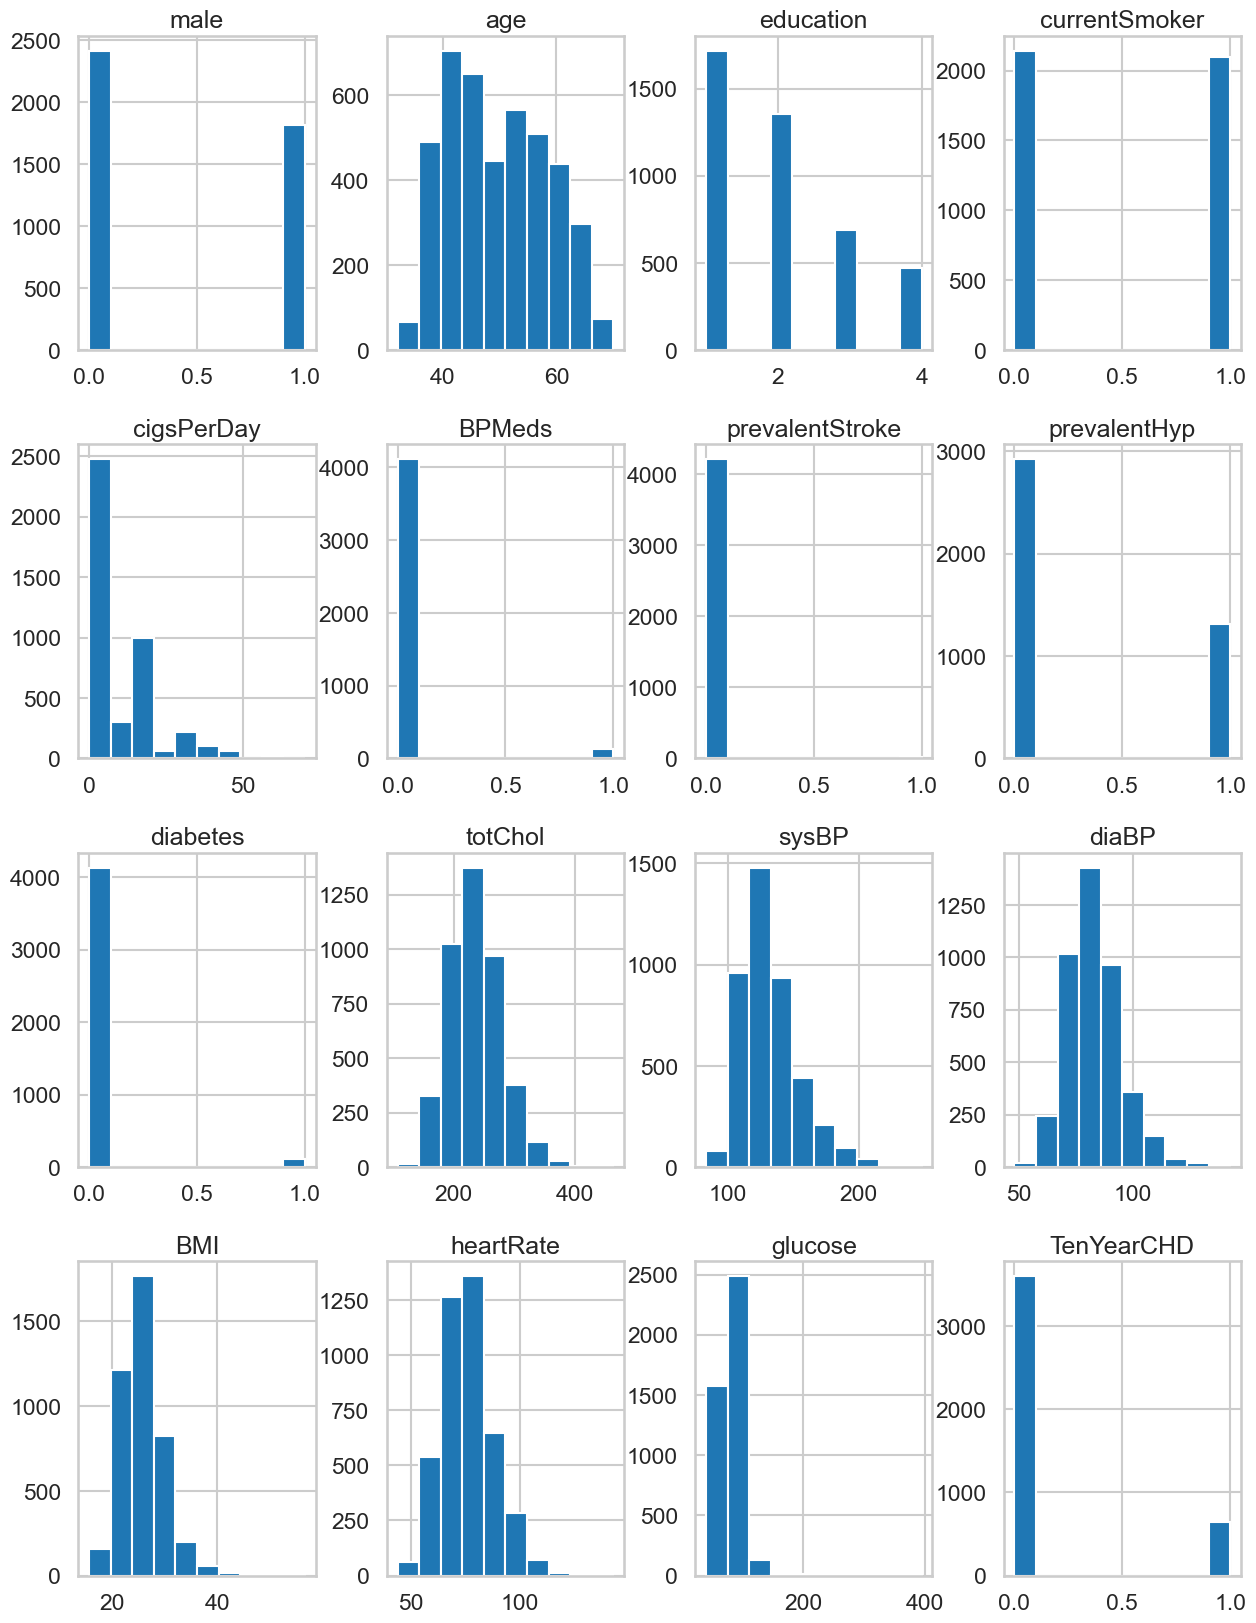

In [437]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data_frame.hist(ax = ax)

Text(0.5, 1.0, 'Distribution of HeartRate')

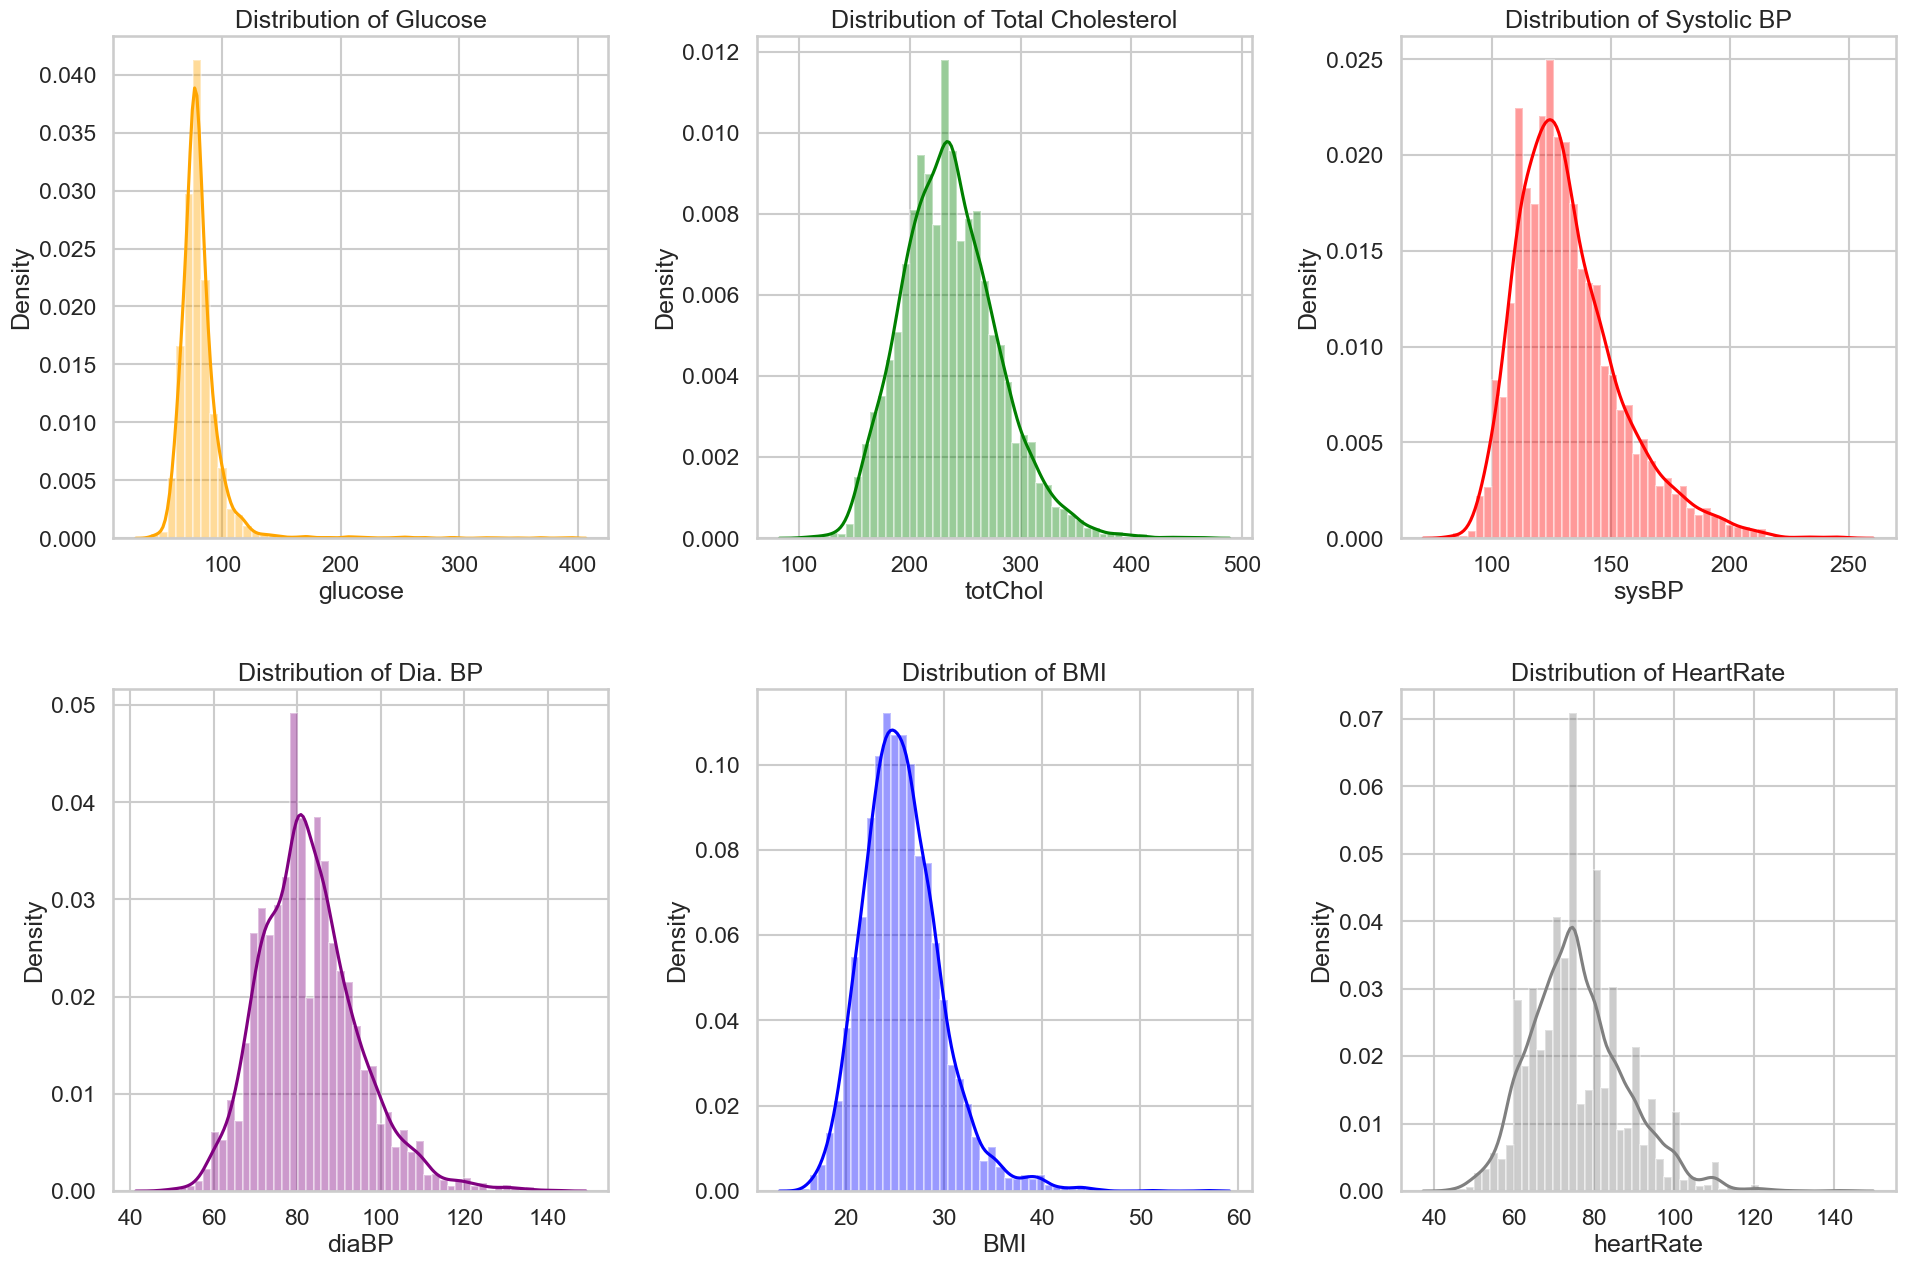

In [438]:
#Distribution of Continuous variables

plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2, 3, 1)
sns.distplot(data_frame['glucose'] , color='orange')
plt.title('Distribution of Glucose')

plt.subplot(2, 3, 2)
sns.distplot(data_frame['totChol'], color='g')
plt.title('Distribution of Total Cholesterol')

plt.subplot(2, 3, 3)
sns.distplot(data_frame['sysBP'], color='r')
plt.title('Distribution of Systolic BP')

plt.subplot(2, 3, 4)
sns.distplot(data_frame['diaBP'] , color='purple')
plt.title('Distribution of Dia. BP')

plt.subplot(2, 3, 5)
sns.distplot(data_frame['BMI'], color='blue')
plt.title('Distribution of BMI')

plt.subplot(2, 3, 6)
sns.distplot(data_frame['heartRate'], color='grey')
plt.title('Distribution of HeartRate')

Observations :

1. We can see Glucose, Total Cholesterol, Systolic BP & BMI is Right Skewed.
2. While Diastolic BP & Heart Rate are close to Normal / Gaussian Distribution

Text(0.5, 1.0, 'Agewise distribution of the patients')

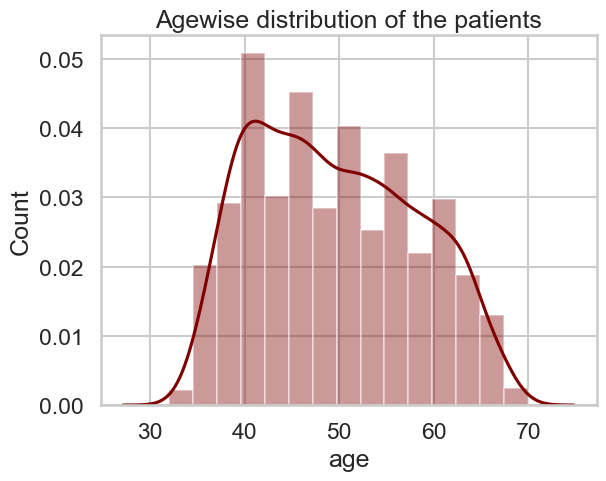

In [439]:
sns.distplot(data_frame['age'], bins=15, kde=True, color='maroon')
plt.ylabel('Count')
plt.title('Agewise distribution of the patients')

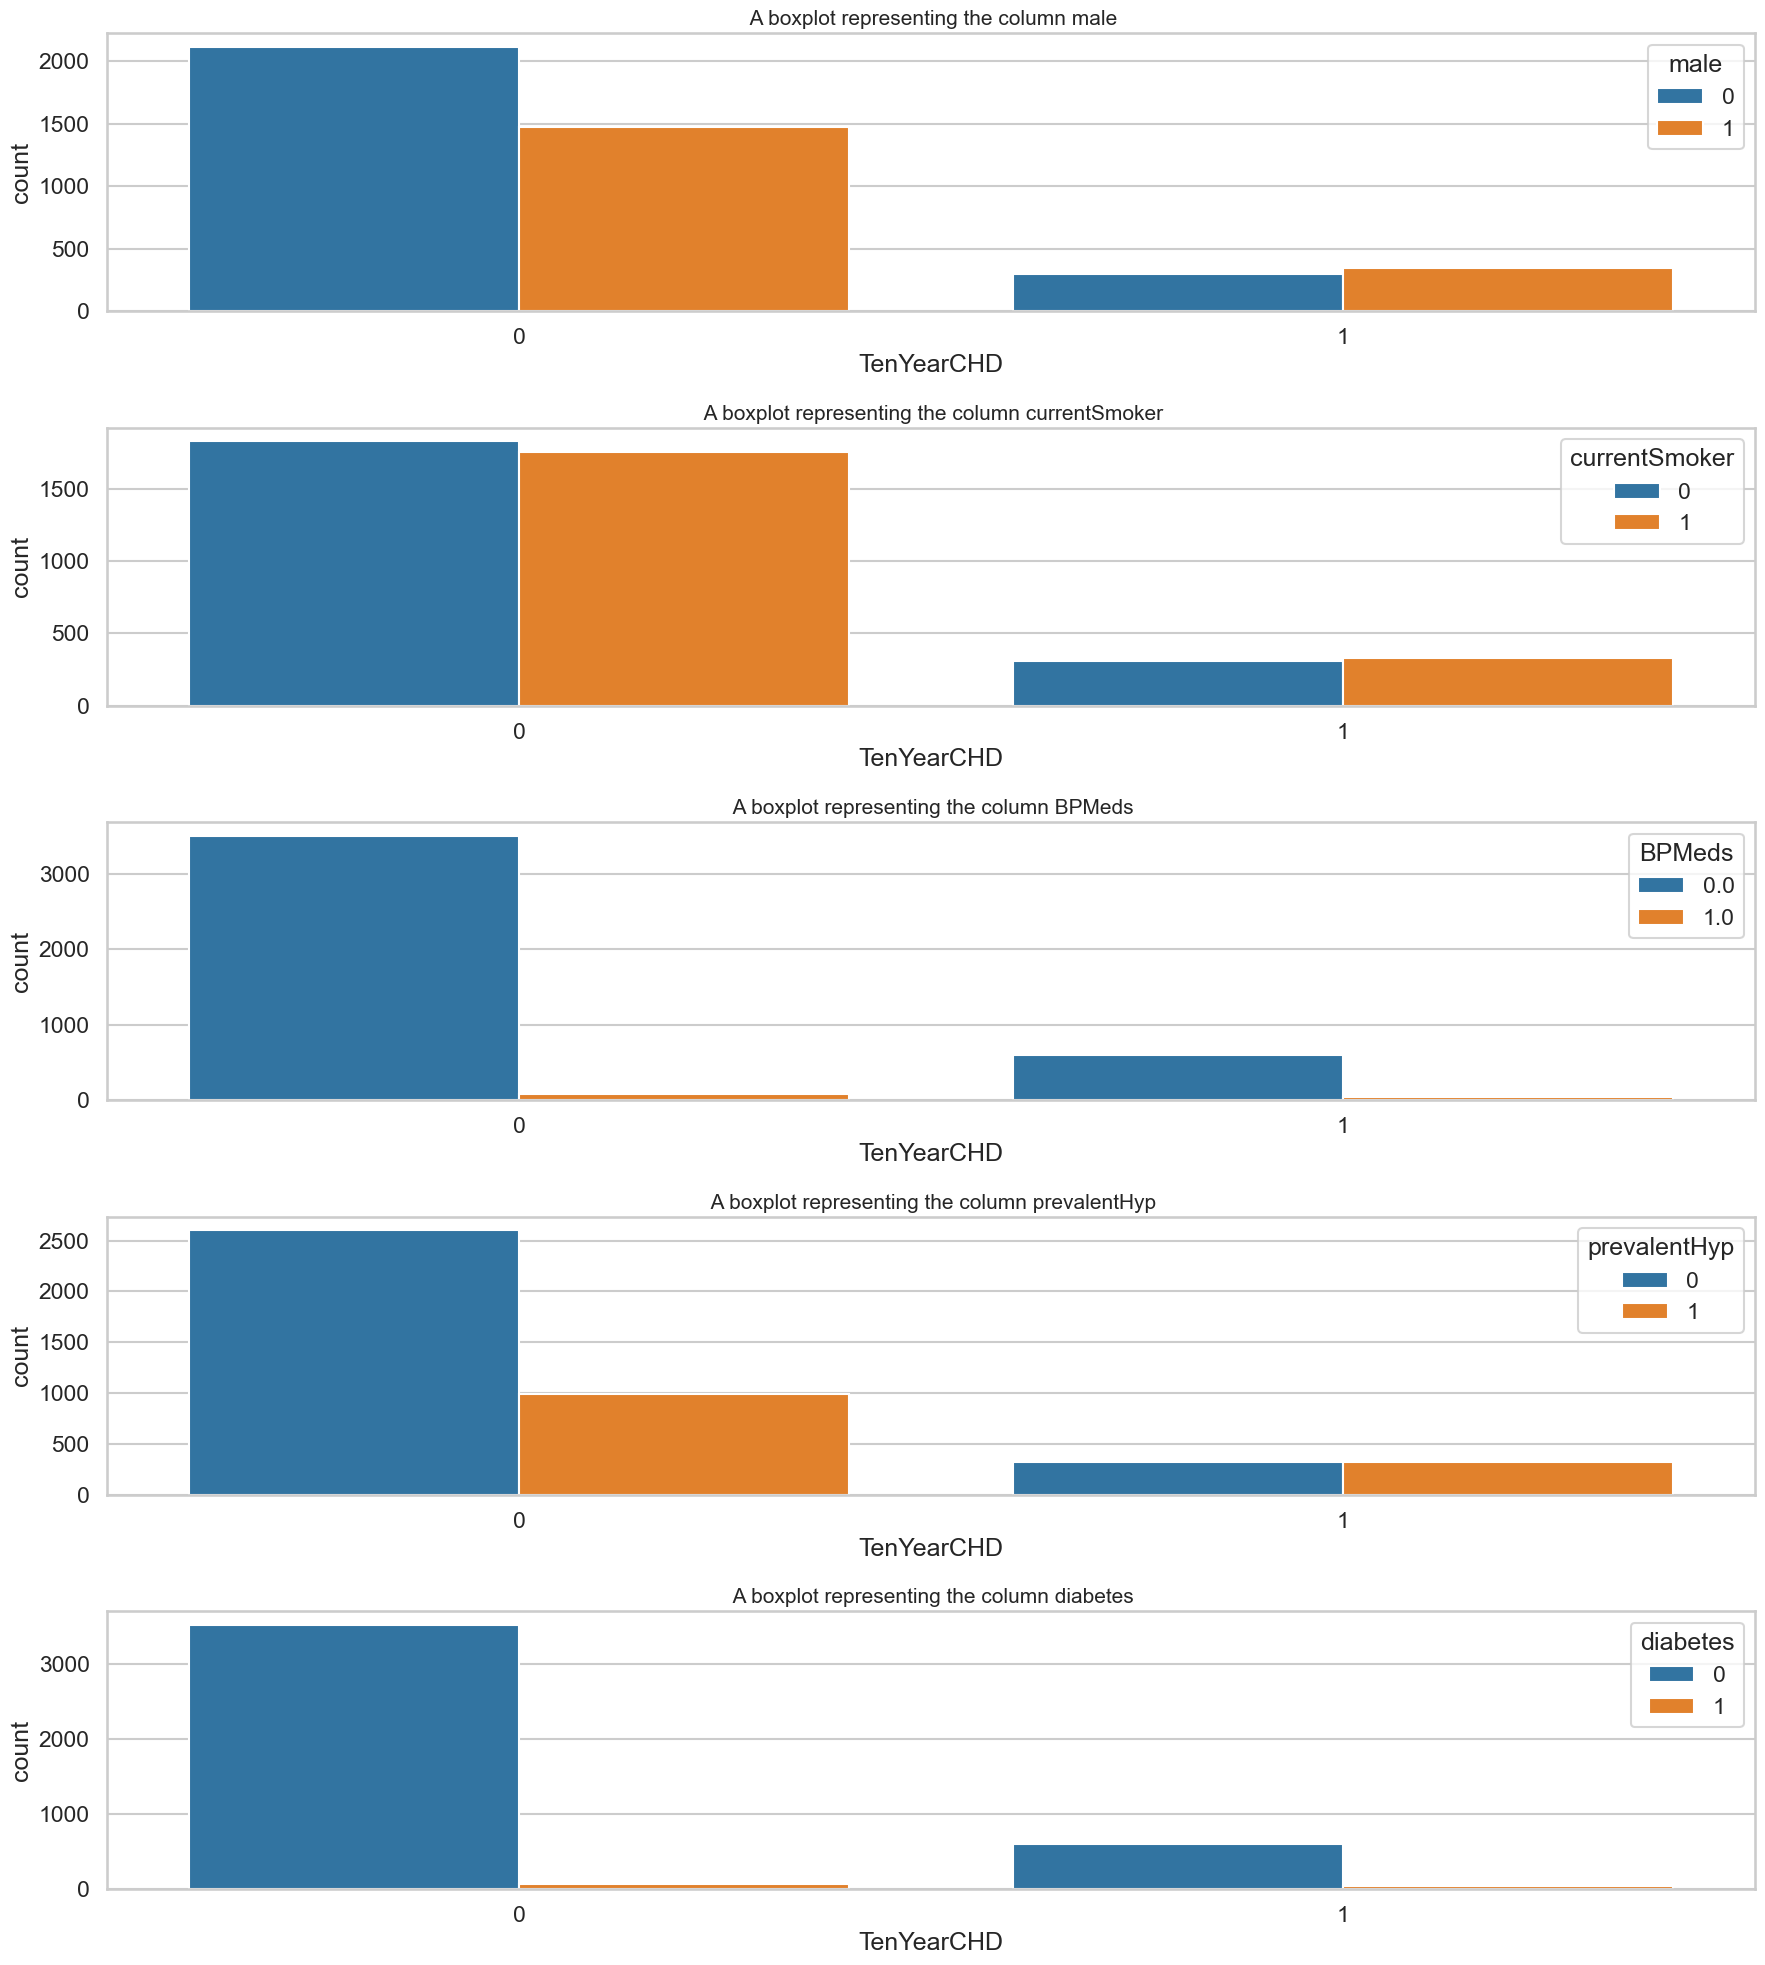

In [440]:
dataset_binary = ['male', 'currentSmoker','BPMeds','prevalentHyp', 'diabetes']

fig, ax = plt.subplots (len(dataset_binary), figsize = (18, 20))
for n,k in enumerate(dataset_binary):
    sns.countplot(x=data_frame['TenYearCHD'], hue = data_frame[k], ax=ax[n])
    ax[n].set_title(" A boxplot representing the column" + " " + k, fontsize = 15)
    fig.tight_layout(pad = 1.1)

## The above plots show that male and Current Smokers are at high risk of getting a heart disease

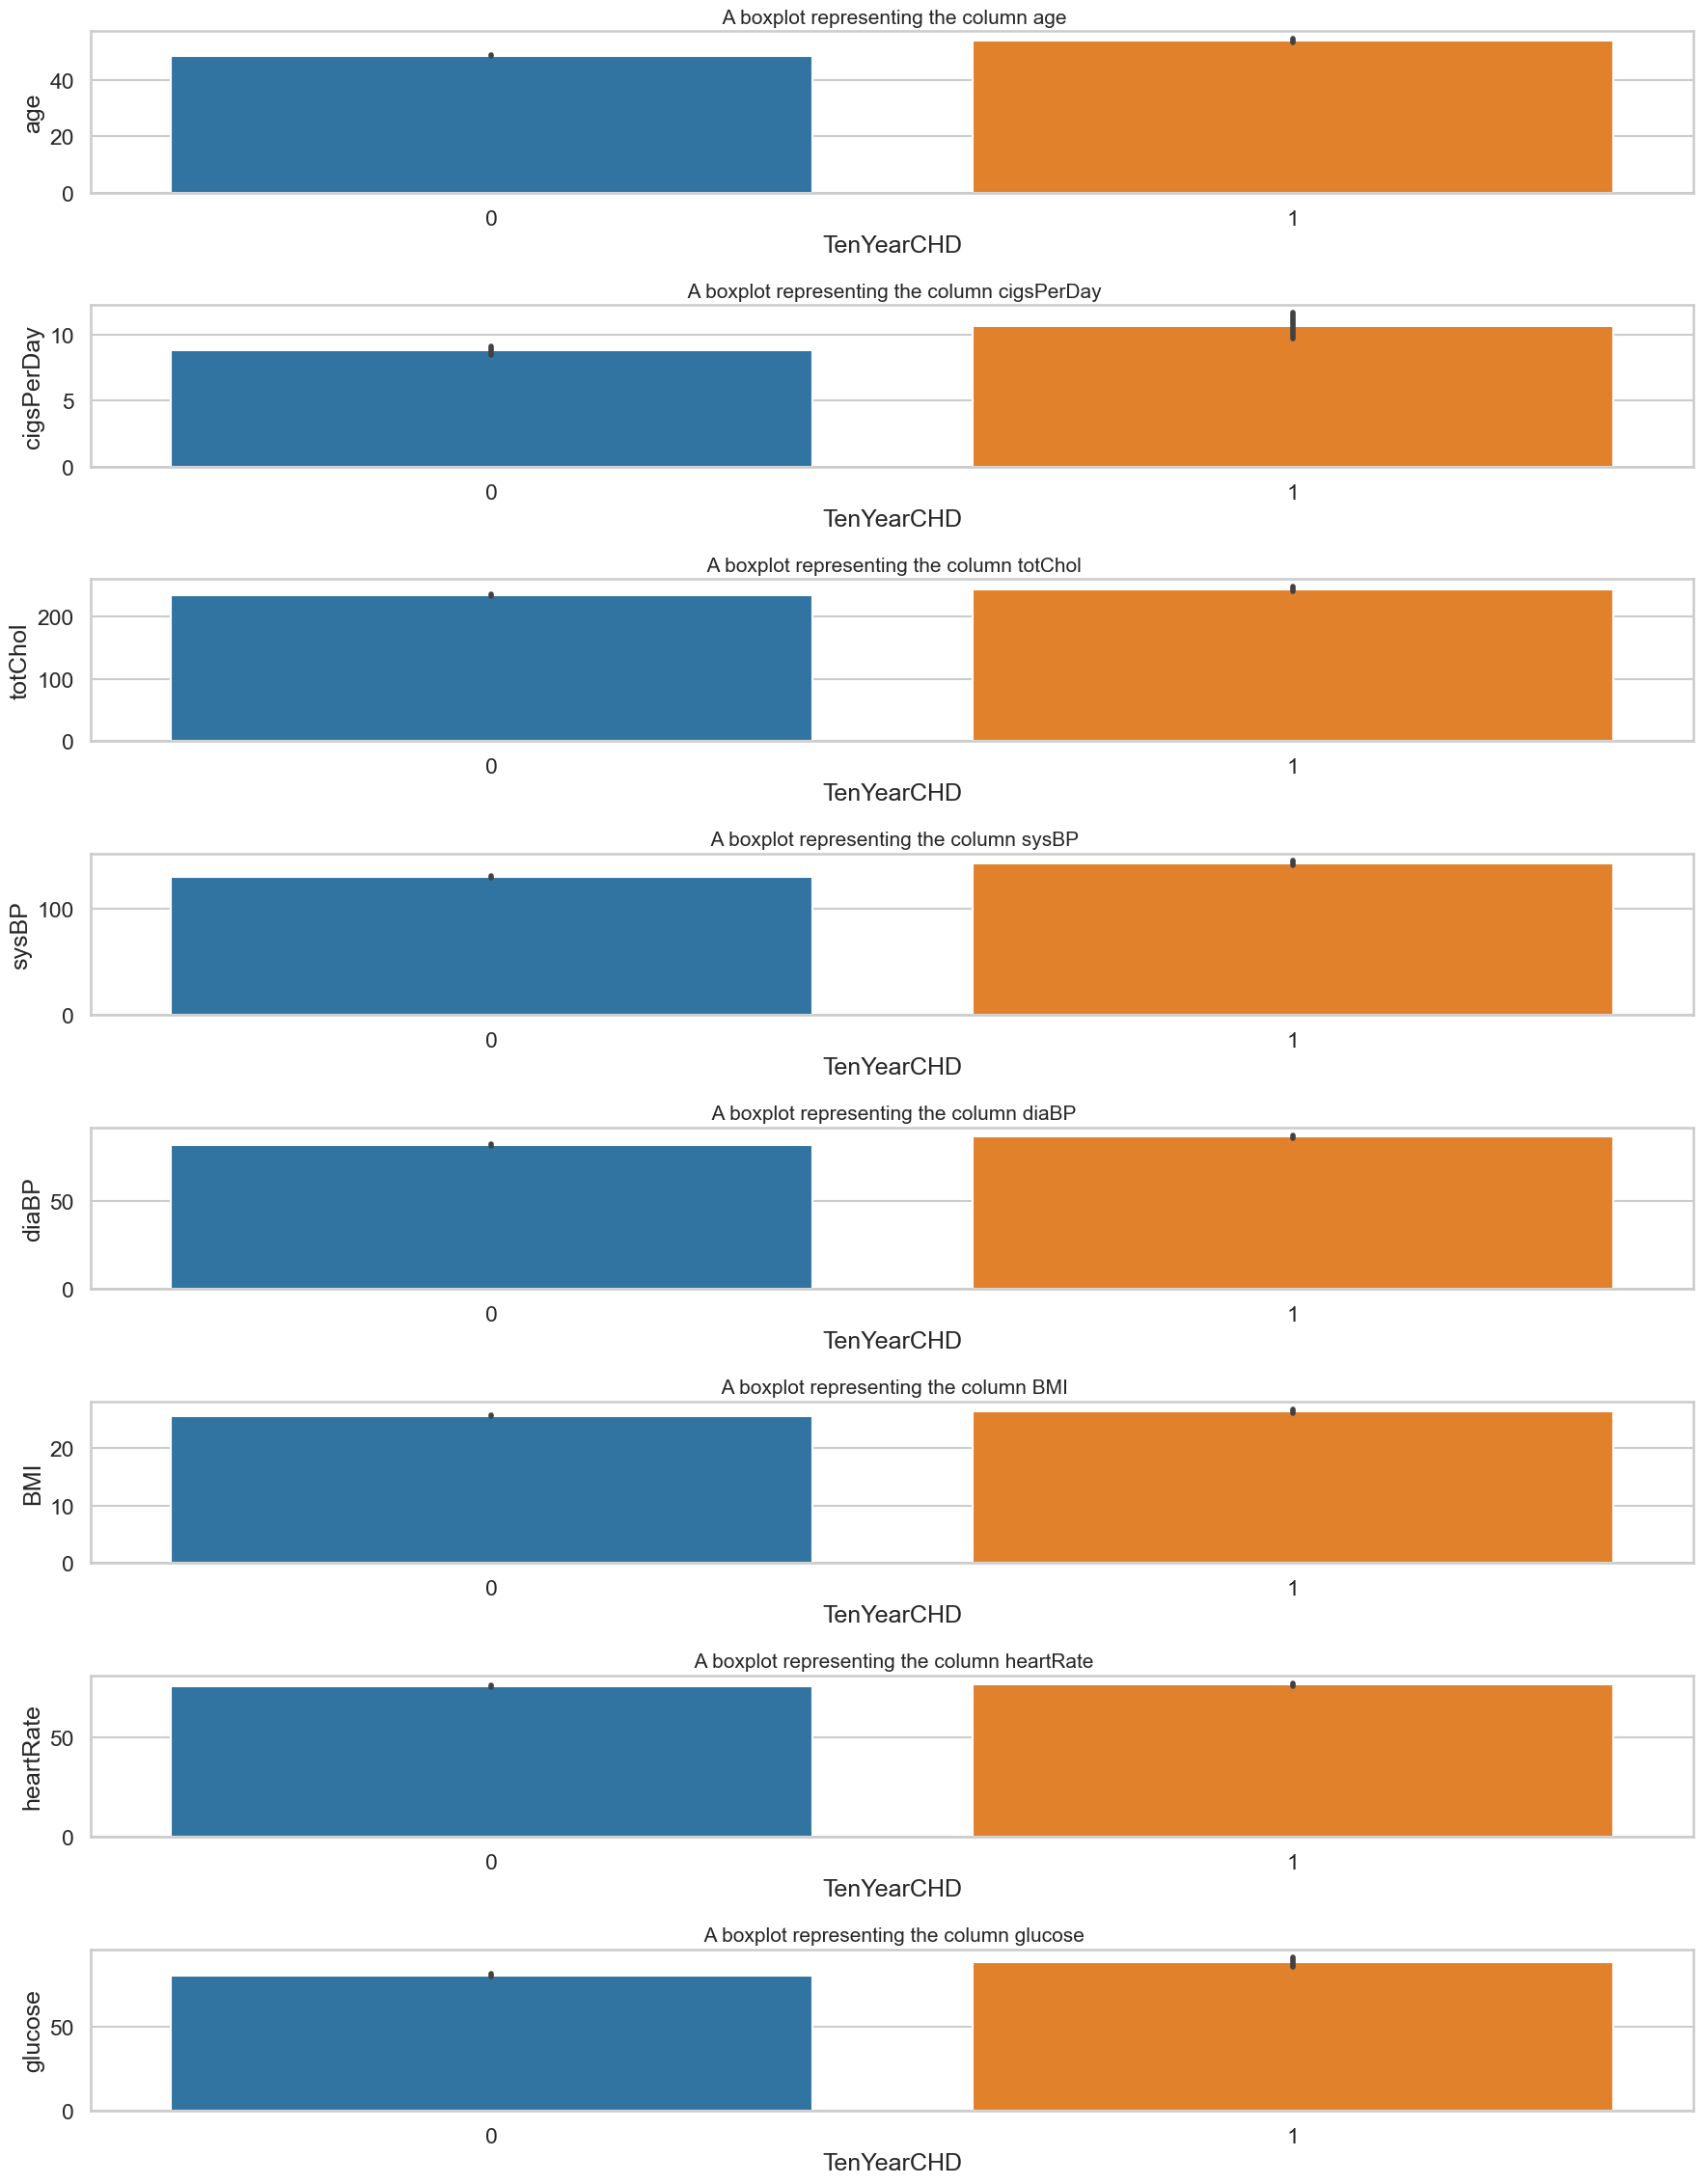

In [441]:
dataset_num = ['age','cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
fig, ax = plt.subplots (len(dataset_num), figsize = (18, 23))
for n,k in enumerate(dataset_num):
    sns.barplot(x=data_frame['TenYearCHD'], y = data_frame[k], ax=ax[n])
    ax[n].set_title(" A boxplot representing the column" + " " + k, fontsize = 15)
    fig.tight_layout(pad = 1.1)

Observation :

Subjects ranging from Age 40 to 50 are in Majority followed by 50 to 70.

In [442]:
#User-defined function

#Age encoding
def encode_age(data):
    if data <= 40:
        return 0
    if data > 40 and data <=55:
        return 1
    else:
        return 2    

#heart rate encoder
def heartrate_enc(data):
    if data <= 60:
        return 0
    if data > 60 and data <=100:
        return 1
    else:
        return 2

#applying functions
data_frame['enc_hr'] = data_frame['heartRate'].apply(heartrate_enc)
data_frame['encode_age'] = data_frame['age'].apply(lambda x : encode_age(x))

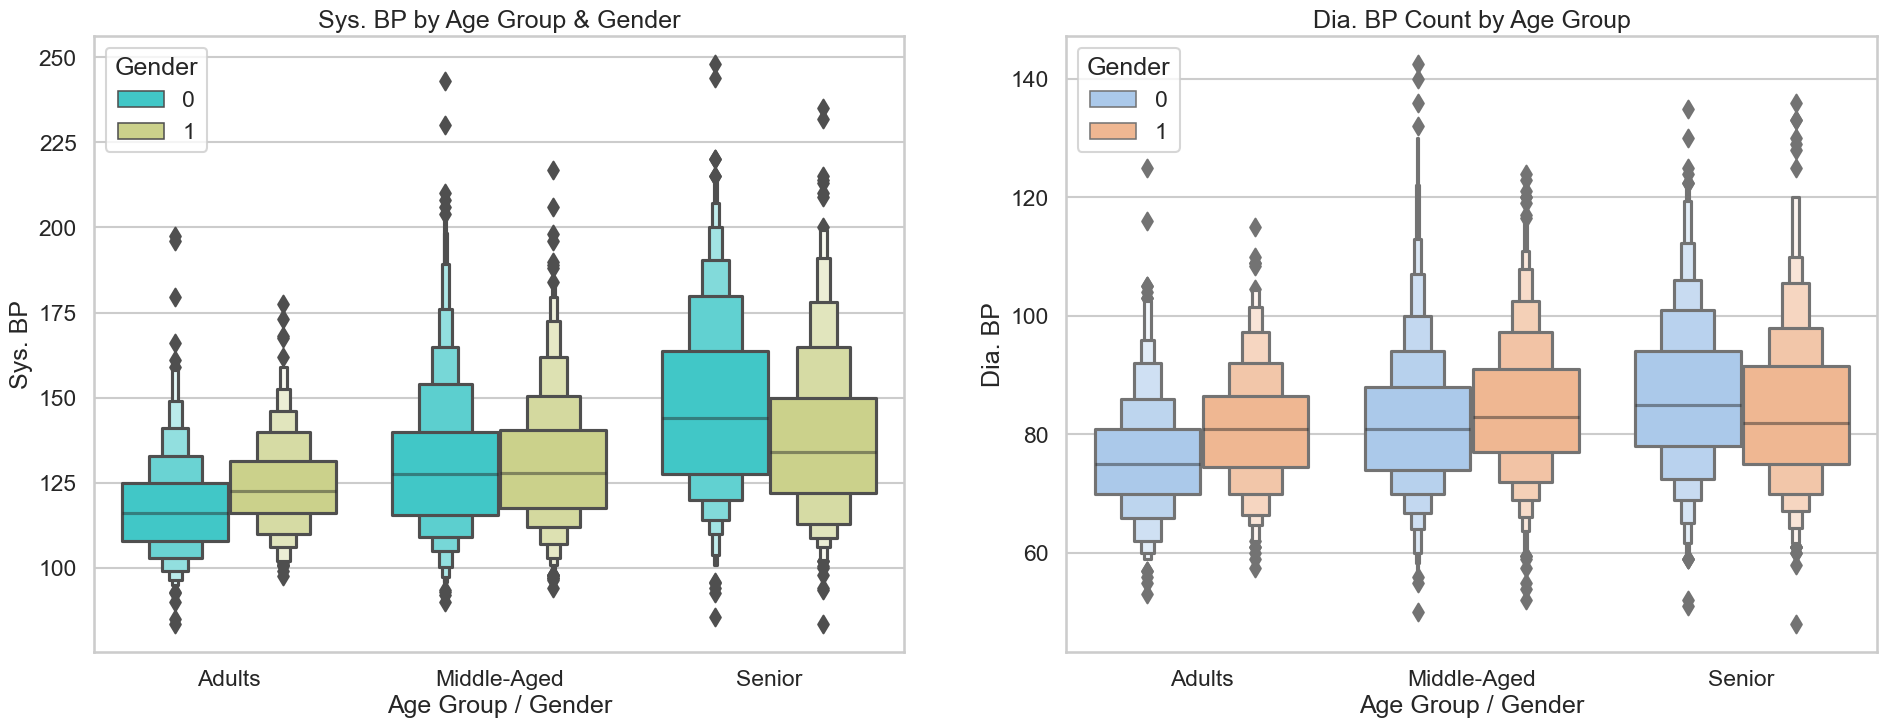

In [443]:
plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encode_age', y='sysBP', hue='male', data=data_frame, palette='rainbow')
plt.xlabel('Age Group / Gender')
plt.ylabel('Sys. BP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Sys. BP by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encode_age', y='diaBP', hue='male', data=data_frame, palette='pastel')
plt.xlabel('Age Group / Gender')
plt.ylabel('Dia. BP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Dia. BP Count by Age Group')
plt.legend(title='Gender')

Observations :

1. Sys. BP by Age Group & Gender : Sys. BP is Increasing by Age Group and Gender.
2. Dia. BP by Age Group & Gender : Similar to Sys. BP , the Dia. BP is seen Increasing by Age Group & Gender.

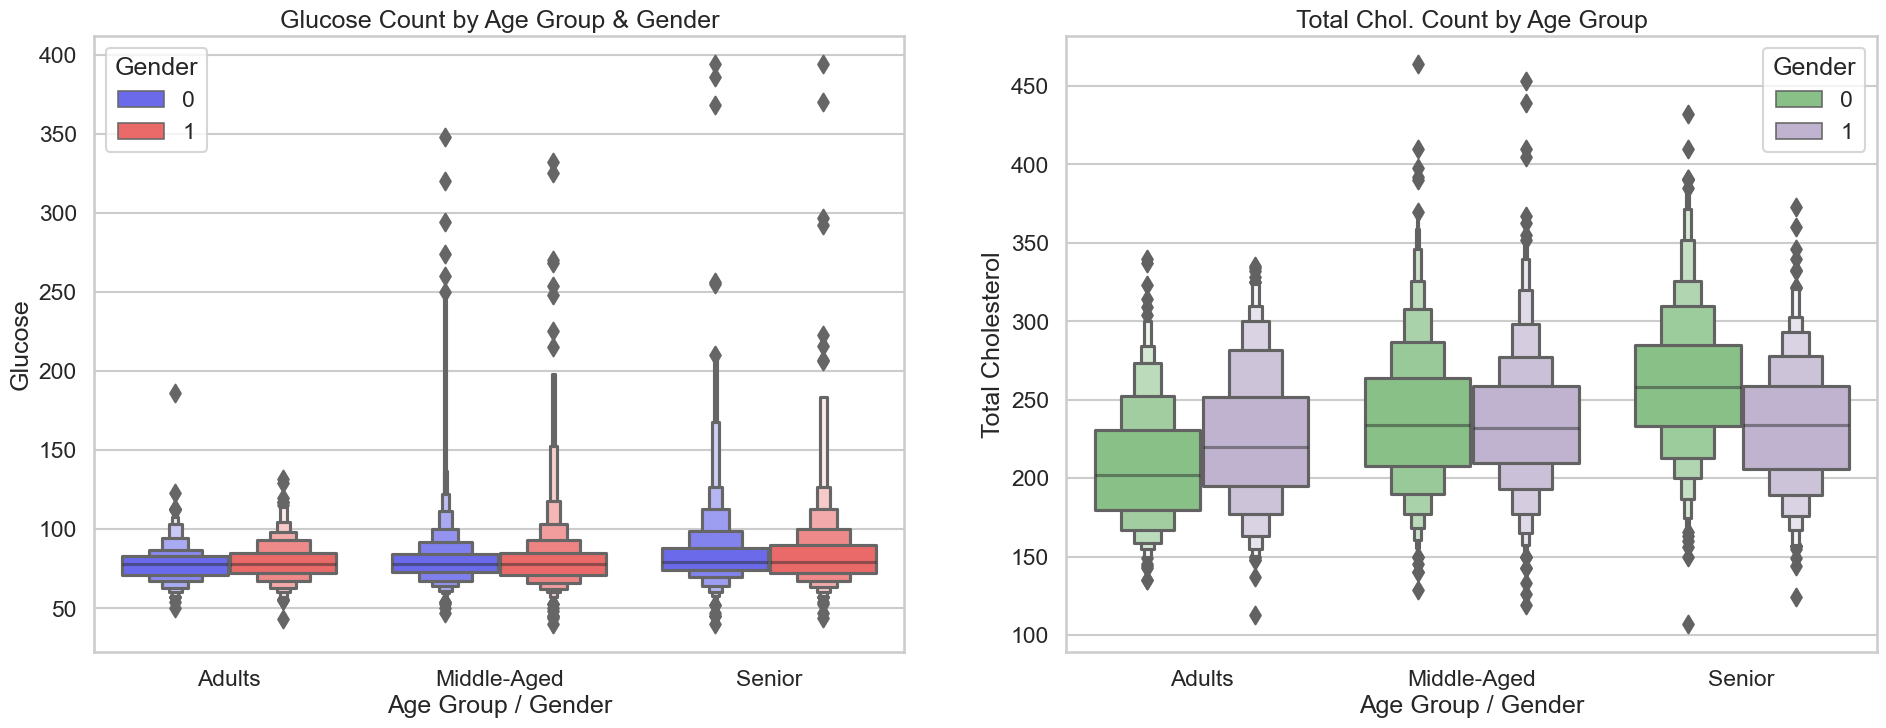

In [444]:
#Multivariate Analysis Pt. 1

plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encode_age', y='glucose', hue='male', data=data_frame, palette='seismic')
plt.xlabel('Age Group / Gender')
plt.ylabel('Glucose')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Glucose Count by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encode_age', y='totChol', hue='male', data=data_frame, palette='Accent')
plt.xlabel('Age Group / Gender')
plt.ylabel('Total Cholesterol')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Total Chol. Count by Age Group')
plt.legend(title='Gender')

Observations :

1. Glucose Count by Age Group & Gender : We can clearly observe that as Age increases the count of Glucose increases too. While Gender wise Glucose Count has almost similiar Median with Few outliers in each.
2. Total Cholesterol by Age Group & Gender : Excluding Outliers, Observation make us Clear that for females Cholesterol level is Increasing by Age considering the Quantile (25%, 50%, 75%) values into account. While, for Males the Cholesterol level Quantile is Approx. Similar for each Age Group.

Text(0.5, 1.0, 'Cigs. per day by Age Group')

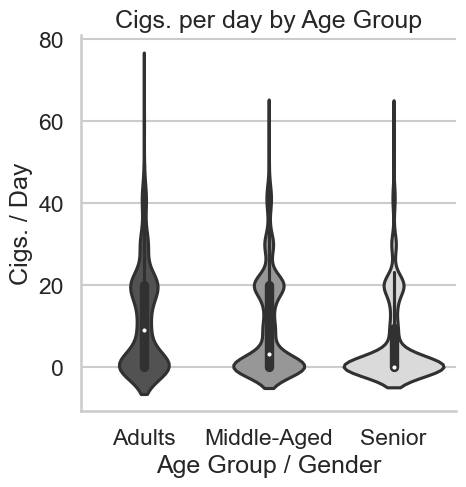

In [445]:
#Violin Plot of Cigsperday by age group

sns.catplot(data=data_frame, x='encode_age', y='cigsPerDay', kind='violin', size=7, palette='Greys_r')
plt.xlabel('Age Group / Gender')
plt.ylabel('Cigs. / Day')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Cigs. per day by Age Group')

## Observation :

1. Adults : In Adults we can observe that Median values has Lower Kernel Density followed by 75% IQR's Density. While, 25% IQR marks the Higher Kernel Density.
2. Middle-Aged : In Middle-Aged Group we can observe that 25% IQR & Median has Higher Kernel Density while 75% IQR has a quite Lower Kernel Density.
3. Senior : In Seniority section we can observe that Median and 25% IQR are Closely Intact to each other having Higher Kernel Density, while 75% IQR got Lower Kernel Density.

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140')])

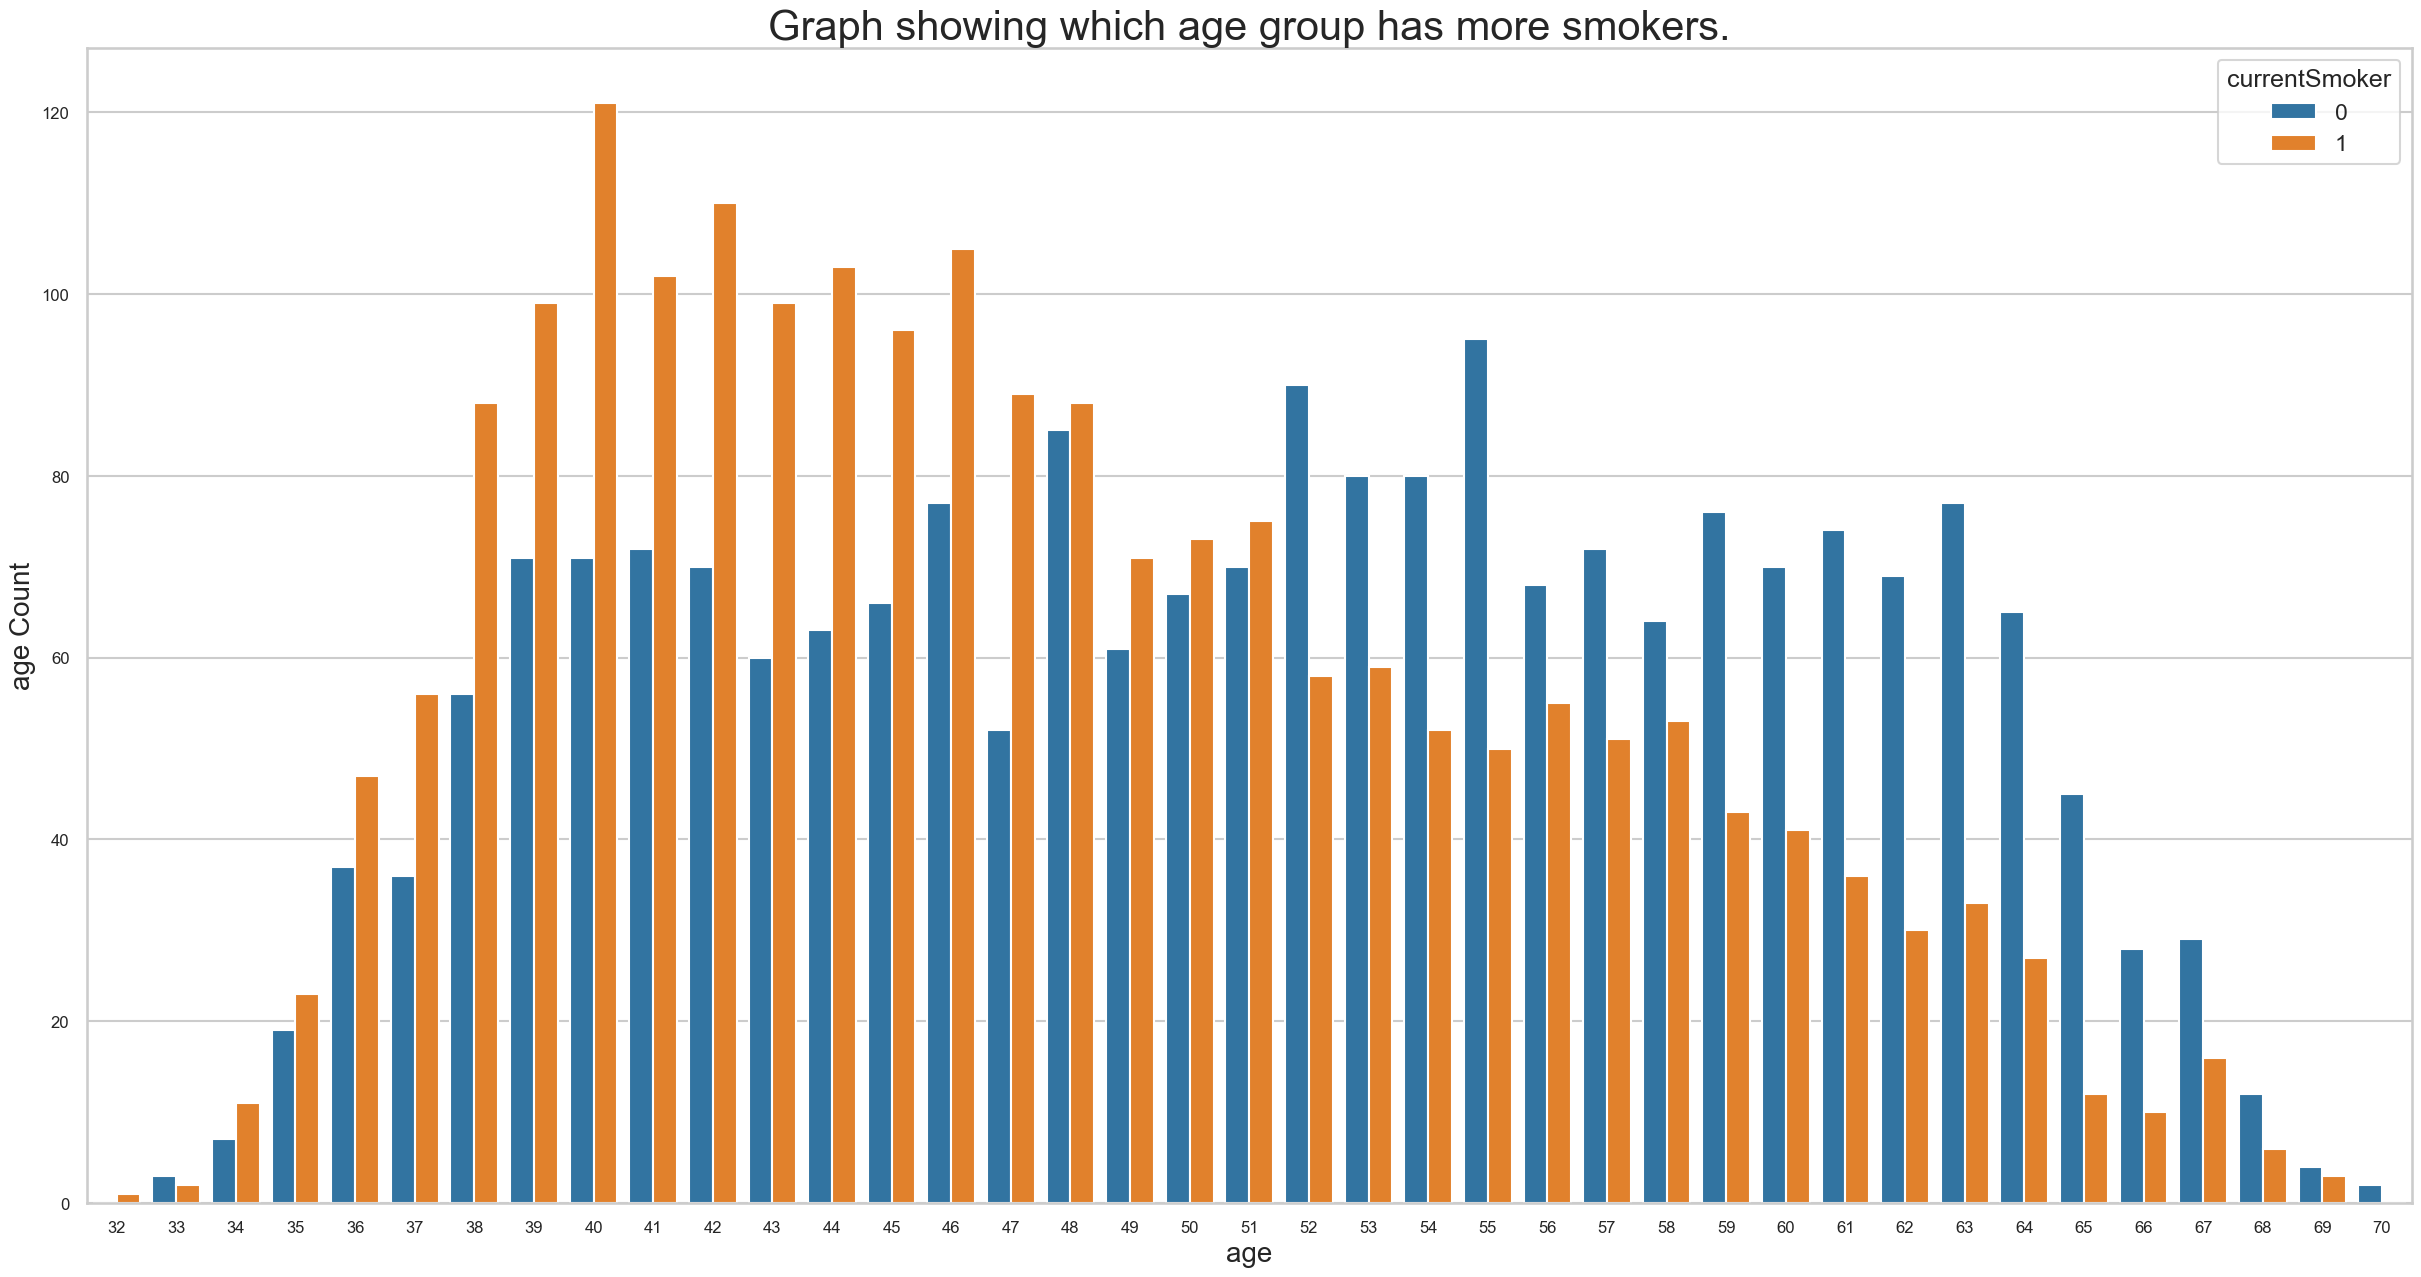

In [446]:
#Distribution of current smokers with respect to age
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x="age",data=data_frame,hue="currentSmoker")
plt.title("Graph showing which age group has more smokers.", size=30)
plt.xlabel("age", size=20)
plt.ylabel("age Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

## Observation-
Mid-age groups ranging from the age of 38 - 46 have more number of currentSmokers
No currentSmokers observed below the age of 32
maximum age for a currentSmokers is 70

<AxesSubplot: xlabel='TenYearCHD', ylabel='age'>

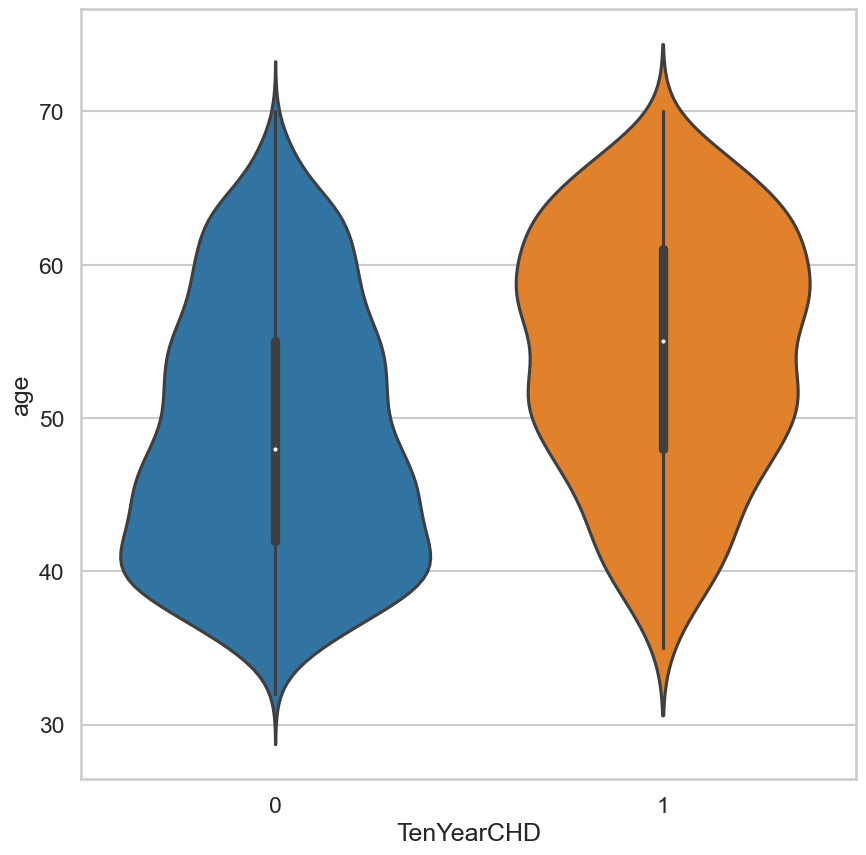

In [447]:
plt.figure(figsize=(10,10))
sns.violinplot(x='TenYearCHD', y='age', data=data_frame)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, -50.0, '−50'),
  Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300')])

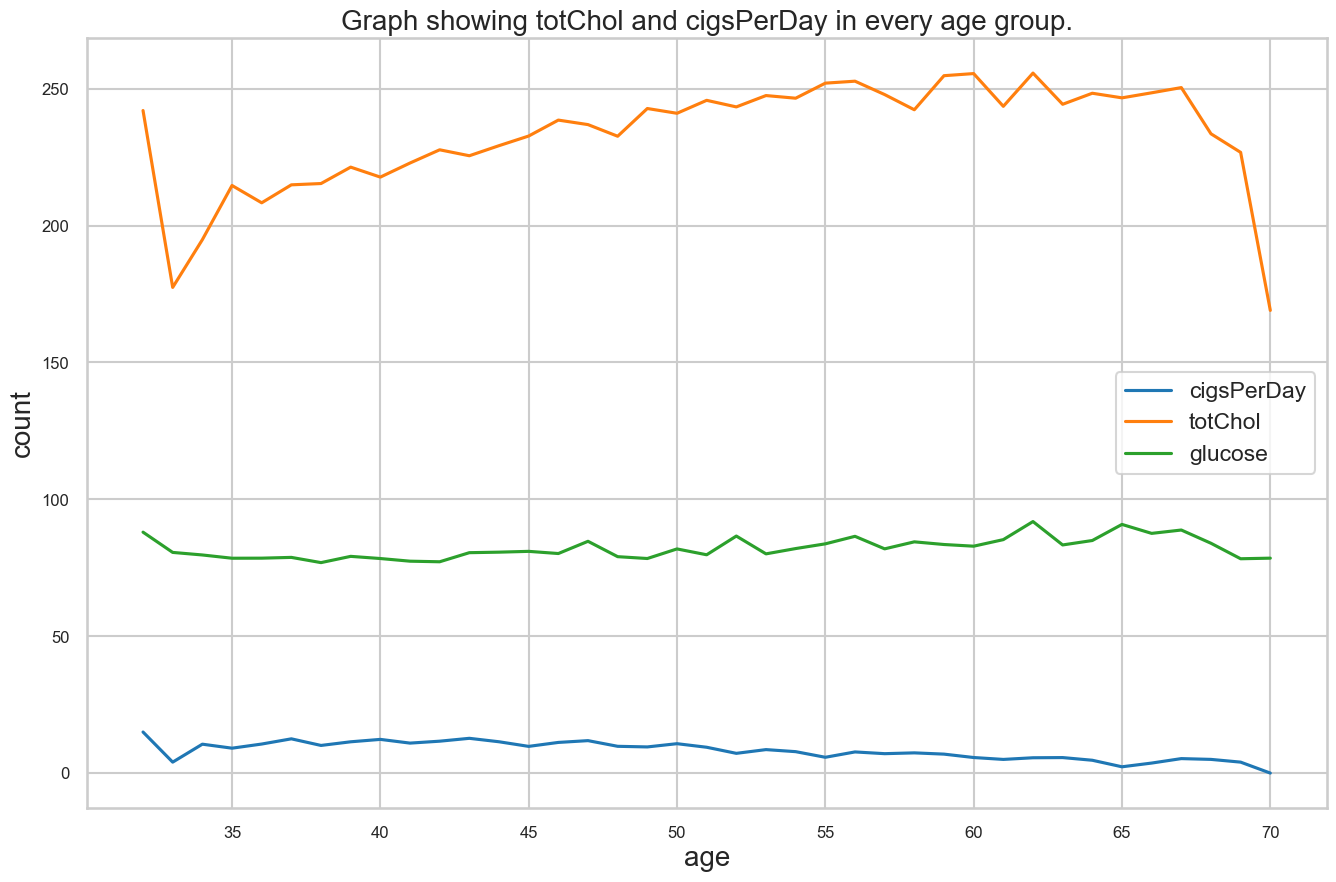

In [448]:
#Plotting a linegraph to check the relationship between age and cigsPerDay, totChol, glucose.

var1 = data_frame.groupby("age").cigsPerDay.mean()
var2 = data_frame.groupby("age").totChol.mean()
var3 = data_frame.groupby("age").glucose.mean()

plt.figure(figsize=(16,10), facecolor='w')
sns.lineplot(data=var1, label="cigsPerDay")
sns.lineplot(data=var2, label="totChol")
sns.lineplot(data=var3, label="glucose")
plt.title("Graph showing totChol and cigsPerDay in every age group.", size=20)
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

There is a minor relation between totChol and glucose.
totChol has a steep, linear and inverse graph for lower ranges of age
cigsPerDay has a fairly parallel relationship with age

Text(0.5, 1.0, 'Target Class Count')

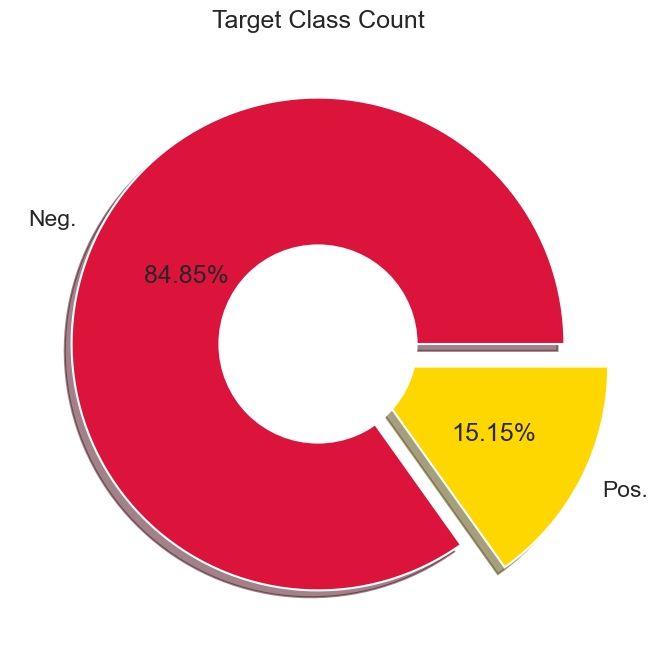

In [449]:
plt.figure(figsize=(8,8))
plt.pie(data_frame['TenYearCHD'].value_counts(), labels=['Neg.','Pos.'], autopct='%1.2f%%', explode=[0,0.2], shadow=True, colors=['crimson','gold'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Class Count')

In [450]:
data_frame.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,enc_hr,encode_age
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,1,1
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,1
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,1,2
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,1,1


In [451]:
# Dropping columns education
data_frame = data_frame.drop(['education'], axis=1)

In [452]:
# Identify the features with the most importance for the outcome variable Heart Disease

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = data_frame.iloc[:,0:14]  #independent columns
y = data_frame.iloc[:,-1]    

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

            Specs        Score
1             age  5099.841031
8         totChol  2115.227321
9           sysBP  1931.270712
3      cigsPerDay  1889.935795
13        glucose   312.899077
10          diaBP   269.716550
6    prevalentHyp   218.979303
2   currentSmoker    68.570414
4          BPMeds    61.961116
11            BMI    41.401382
7        diabetes    30.969003


In [453]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
1,age,5099.841031
8,totChol,2115.227321
9,sysBP,1931.270712
3,cigsPerDay,1889.935795
13,glucose,312.899077
10,diaBP,269.716550
6,prevalentHyp,218.979303
2,currentSmoker,68.570414
4,BPMeds,61.961116
11,BMI,41.401382


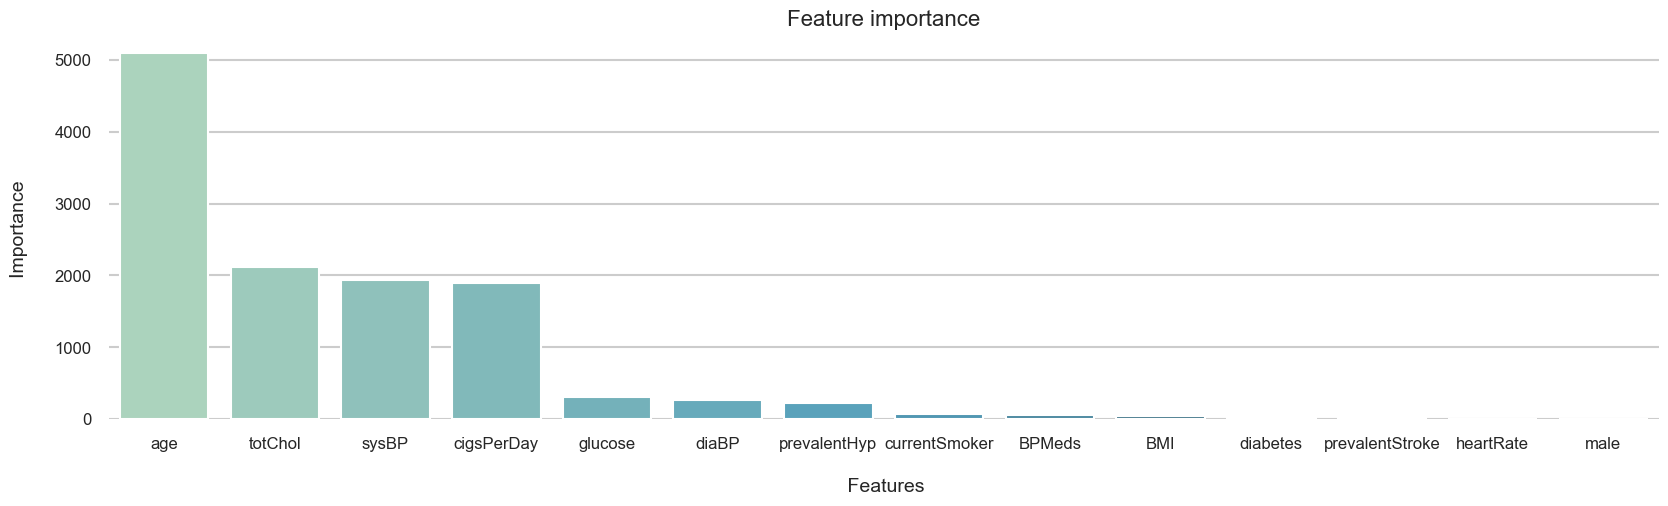

In [454]:
# visualizing feature selection
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [569]:
# assign the all the column names, exept 'TenYearCHD', to columns 
columns = ['age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'prevalentStroke','BMI', 'glucose']

y = data_frame['TenYearCHD']
X = data_frame[columns]
# train and split the data 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42, shuffle= False, stratify= None)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [570]:
print(len(X_train))
len(X_test)

3389


848

In [537]:
clf1 = LogisticRegression(random_state=42)

param_grid = { 
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

model_clf1 = GridSearchCV(estimator=clf1, param_grid=param_grid, cv= 10)
model_clf1.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [538]:
model_clf1.best_params_

{'penalty': 'l1', 'solver': 'saga'}

In [539]:
clf1 = LogisticRegression(penalty = 'l1', solver = 'saga')
clf1.fit(X_train, y_train)
predictions1 = clf1.predict(X_test)
print(accuracy_score(y_test, predictions1))
print(cross_val_score(clf1, X_train, y_train, cv = 10, scoring = 'accuracy'))

0.8549528301886793
[0.84955752 0.84955752 0.85840708 0.85250737 0.84365782 0.85250737
 0.84660767 0.85840708 0.87020649 0.84911243]


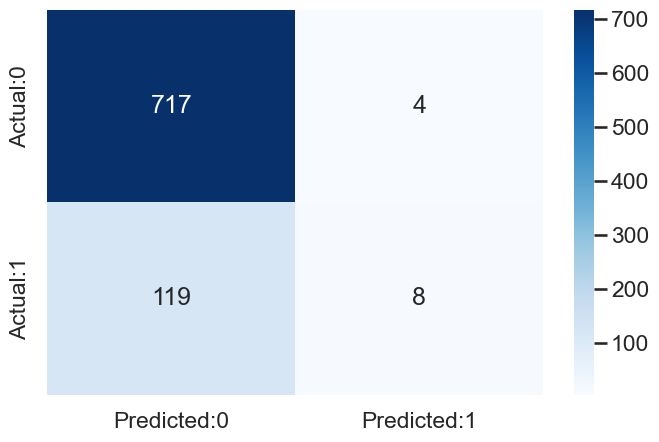

The details for confusion matrix is =


In [540]:
cm1 = confusion_matrix(y_test, predictions1) 
conf_matrix1 = pd.DataFrame(data = cm1,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix1, annot = True, fmt = 'd', cmap = "Blues") 
plt.show() 
  
print('The details for confusion matrix is =') 

In [541]:
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       721
           1       0.67      0.06      0.12       127

    accuracy                           0.85       848
   macro avg       0.76      0.53      0.52       848
weighted avg       0.83      0.85      0.80       848



In [542]:
# define a new keras model for binary classification
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.layers.core import Dense, Dropout, Activation
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=11, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 64)                768       
                                                                 
 dropout_38 (Dropout)        (None, 64)                0         
                                                                 
 dense_58 (Dense)            (None, 32)                2080      
                                                                 
 dropout_39 (Dropout)        (None, 32)                0         
                                                                 
 dense_59 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________
None


In [543]:
history = binary_model.fit(X_train, y_train, epochs=100, batch_size=150, verbose = 1, validation_data= (X_test,y_test))


Epoch 1/100
23/23 [==============================] - 1s 13ms/step - loss: 0.5866 - accuracy: 0.8330 - val_loss: 0.4651 - val_accuracy: 0.8502
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4413 - accuracy: 0.8480 - val_loss: 0.4247 - val_accuracy: 0.8502
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4311 - accuracy: 0.8480 - val_loss: 0.4235 - val_accuracy: 0.8502
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4293 - accuracy: 0.8480 - val_loss: 0.4222 - val_accuracy: 0.8502
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4264 - accuracy: 0.8480 - val_loss: 0.4213 - val_accuracy: 0.8502
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4264 - accuracy: 0.8480 - val_loss: 0.4203 - val_accuracy: 0.8502
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4251 - accuracy: 0.8480 - val_loss: 0.4193 - val_accuracy: 0.8502
Epoch 8/100


In [544]:
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(y_test, binary_pred))
print(classification_report(y_test, binary_pred))

27/27 [==============================] - 0s 2ms/step
Results for Binary Model
0.8514150943396226
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       721
           1       1.00      0.01      0.02       127

    accuracy                           0.85       848
   macro avg       0.93      0.50      0.47       848
weighted avg       0.87      0.85      0.78       848



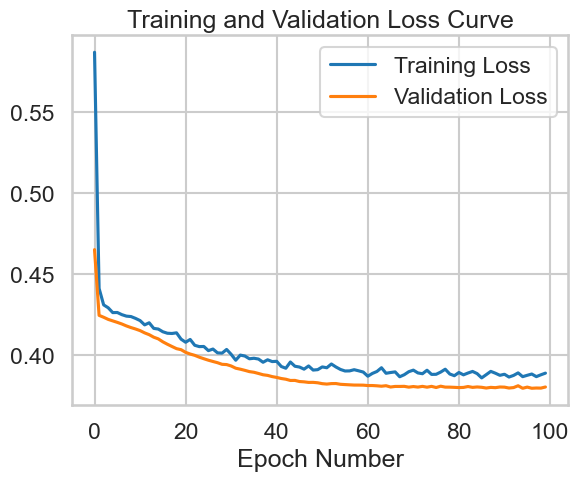

In [545]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
no_epochs = 100
epochs_range=range(no_epochs)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss Curve')
plt.xlabel('Epoch Number')
plt.show()

In [546]:
rf = RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 100)]
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=7, 
                               n_jobs = -1)

rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 218, 236, 254,
                                                         272, 290, 309, 327,
                                                         345, 363, 381, 400,
                                                         418, 436, 454, 472,
                                                         490, 509, 527, 545,
                                                         563, 581, 600, 618,
                                                         636, 654, 672, 690,
                                                         709, 727, ...]},
                   random_state=7, verbose=2)

In [547]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=70, max_features='auto', min_samples_split=10,
                       n_estimators=1781)

In [548]:
clf2 = RandomForestClassifier(criterion = 'gini', max_depth = 70, max_features = 'auto', n_estimators = 1781, min_samples_split=10)
clf2.fit(X_train, y_train)
predictions2 = clf2.predict(X_test)
print(accuracy_score(y_test, predictions2))
print(cross_val_score(clf2, X_train, y_train, cv = 10, scoring = 'accuracy'))

0.8466981132075472
[0.84660767 0.84365782 0.85250737 0.84660767 0.84955752 0.83775811
 0.84365782 0.84660767 0.85840708 0.85207101]


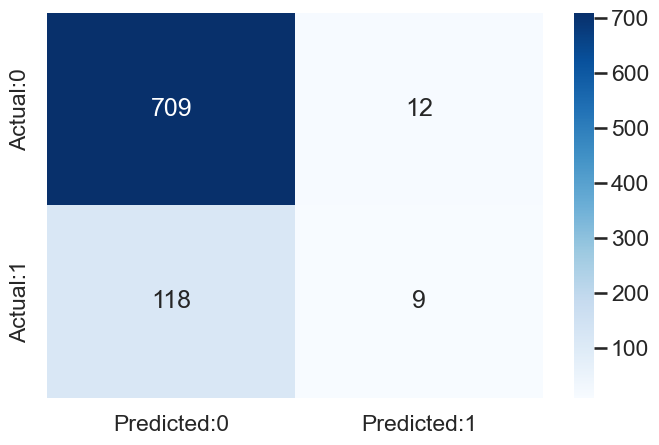

The details for confusion matrix is =


In [549]:
cm2 = confusion_matrix(y_test, predictions2) 
conf_matrix2 = pd.DataFrame(data = cm2,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix2, annot = True, fmt = 'd', cmap = "Blues") 
plt.show() 
  
print('The details for confusion matrix is =') 

In [550]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       721
           1       0.43      0.07      0.12       127

    accuracy                           0.85       848
   macro avg       0.64      0.53      0.52       848
weighted avg       0.79      0.85      0.80       848



In [551]:
knn = KNeighborsClassifier(n_neighbors=15)
model3 = knn.fit(X_train, y_train)
prediction3 = knn.predict(X_test)
print(accuracy_score(y_test, predictions3))
print(cross_val_score(model3, X_train, y_train, cv = 10, scoring = 'accuracy'))

0.8502358490566038
[0.84660767 0.84955752 0.84660767 0.84660767 0.84955752 0.84955752
 0.84365782 0.84070796 0.85250737 0.85207101]


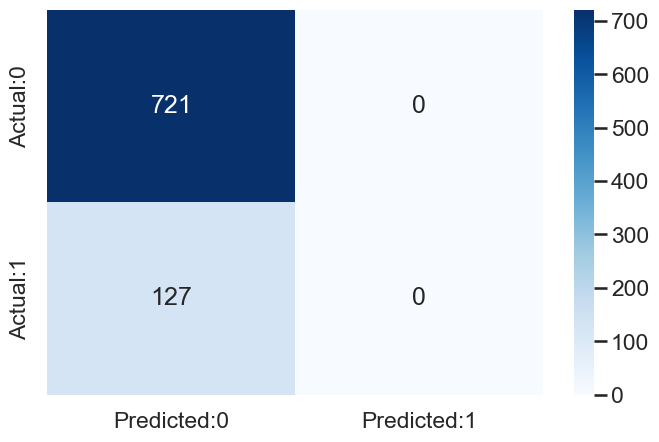

The details for confusion matrix is =


In [552]:
cm3 = confusion_matrix(y_test, predictions3) 
conf_matrix3 = pd.DataFrame(data = cm3,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix3, annot = True, fmt = 'd', cmap = "Blues") 
plt.show() 
  
print('The details for confusion matrix is =') 

In [553]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       721
           1       0.25      0.02      0.04       127

    accuracy                           0.84       848
   macro avg       0.55      0.51      0.48       848
weighted avg       0.76      0.84      0.78       848



In [554]:
#Number of trees
n_estimators = [int(i) for i in np.linspace(start=100,stop=1000,num=10)]
max_features = ['auto','sqrt']
max_depth = [int(i) for i in np.linspace(10, 100, num=10)]
max_depth.append(None)
min_samples_split=[2,5,10]
min_samples_leaf = [1,2,4]

#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [555]:
gb=GradientBoostingClassifier(random_state=0)
#Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=random_grid,
                              n_iter=100, scoring='f1', 
                              cv=3, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
gb_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=0, return_train_score=True, scoring='f1',
                   verbose=2)

In [556]:
gb_random.best_estimator_

GradientBoostingClassifier(max_depth=20, max_features='auto', n_estimators=300,
                           random_state=0)

In [571]:
model4 =  GradientBoostingClassifier(max_depth=20, max_features='auto', n_estimators=300,
                           random_state=0)
model4.fit(X_train,y_train)
prediction4 = gvc.predict(X_test)
cm4 = confusion_matrix(y_test, prediction4)
gvc_acc_score = accuracy_score(y_test, prediction4)
print("confussion matrix")
print(cm4)

confussion matrix
[[680  41]
 [ 82  45]]


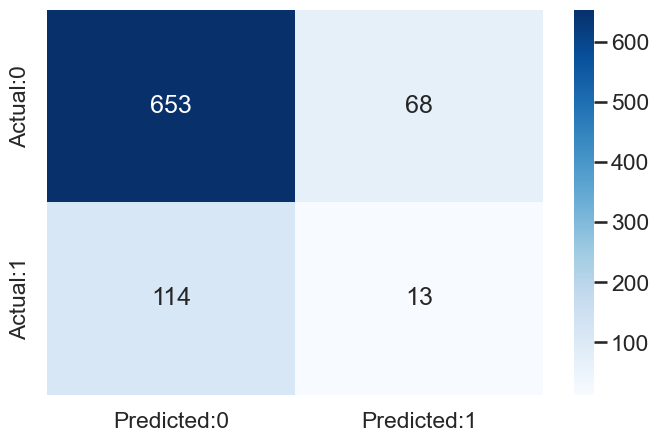

The details for confusion matrix is =


In [572]:
cm4 = confusion_matrix(y_test, predictions4) 
conf_matrix4 = pd.DataFrame(data = cm4,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix4, annot = True, fmt = 'd', cmap = "Blues") 
plt.show() 
  
print('The details for confusion matrix is =') 

In [573]:
print(classification_report(y_test,prediction4))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       721
           1       0.52      0.35      0.42       127

    accuracy                           0.85       848
   macro avg       0.71      0.65      0.67       848
weighted avg       0.84      0.85      0.84       848



In [574]:
classifier = SVC(random_state=42)

param_grid = { 
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5, 6],
    'gamma' : ['scale', 'auto']
}

gscv_clf5 = GridSearchCV(estimator=classifier, param_grid=param_grid, cv= 10)
gscv_clf5.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid={'degree': [2, 3, 4, 5, 6], 'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [575]:
gscv_clf5.best_params_

{'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

In [576]:
clf5 = SVC(degree = 2, gamma = 'scale', kernel= 'poly')
clf5.fit(X_train, y_train)
print(cross_val_score(clf5, X_train, y_train, cv = 10, scoring = 'accuracy'))
predictions5 = clf5.predict(X_test)

[0.84365782 0.84955752 0.85250737 0.85250737 0.85545723 0.85250737
 0.84660767 0.84660767 0.85545723 0.84911243]


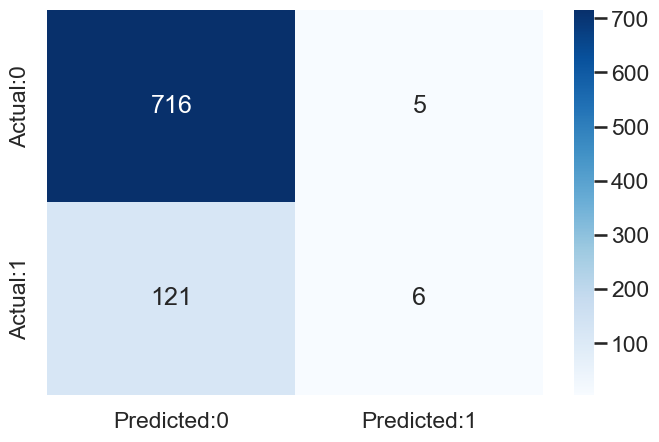

The details for confusion matrix is =


In [577]:
cm5 = confusion_matrix(y_test, predictions5) 
conf_matrix5 = pd.DataFrame(data = cm5,  
            columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix5, annot = True, fmt = 'd', cmap = "Blues") 
plt.show() 
  
print('The details for confusion matrix is =') 

In [578]:
print(classification_report(y_test, predictions5))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       721
           1       0.55      0.05      0.09       127

    accuracy                           0.85       848
   macro avg       0.70      0.52      0.50       848
weighted avg       0.81      0.85      0.79       848



In [579]:
from sklearn.tree import DecisionTreeClassifier
clf6 = DecisionTreeClassifier(min_samples_split=40, random_state=0) 
clf6.fit(X_train, y_train)
predictions6 = clf6.predict(X_test)

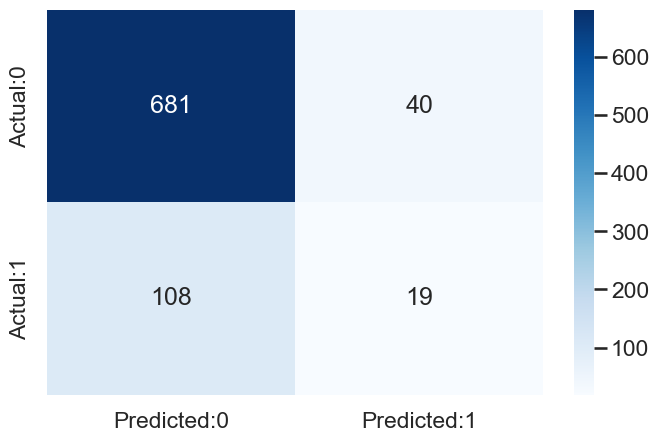

The details for confusion matrix is =


In [580]:
cm6 = confusion_matrix(y_test, predictions6) 
conf_matrix6 = pd.DataFrame(data = cm6,  
            columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix6, annot = True, fmt = 'd', cmap = "Blues") 
plt.show() 
  
print('The details for confusion matrix is =') 

In [581]:
print(classification_report(y_test, predictions6))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       721
           1       0.32      0.15      0.20       127

    accuracy                           0.83       848
   macro avg       0.59      0.55      0.55       848
weighted avg       0.78      0.83      0.80       848



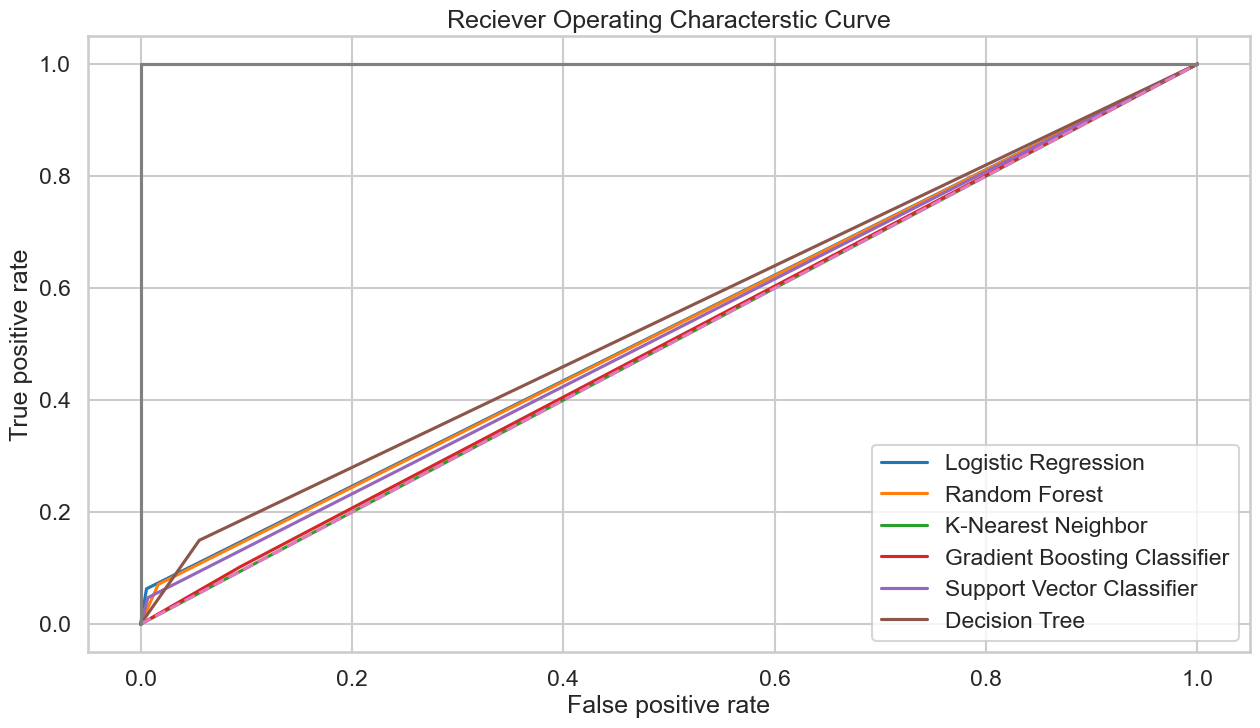

In [582]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,predictions1)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,predictions3)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,predictions2)                                                             
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,predictions6)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,predictions5)
gbc_false_positive_rate,gbc_true_positive_rate,gbc_threshold = roc_curve(y_test,predictions4)

sns.set_style('whitegrid')
plt.figure(figsize=(15,8), facecolor='w')
plt.title('Reciever Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(gbc_false_positive_rate,gbc_true_positive_rate,label='Gradient Boosting Classifier')
plt.plot(svc_false_positive_rate,svc_true_positive_rate, label='Support Vector Classifier')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Decision Tree')

plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [61]:
target1=data_frame[data_frame['TenYearCHD']==1]
target0=data_frame[data_frame['TenYearCHD']==0]

In [62]:
from sklearn.utils import resample
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)
target=pd.concat([target0,target1])
target['TenYearCHD'].value_counts()

0    3596
1    3596
Name: TenYearCHD, dtype: int64

In [63]:
df_data = target

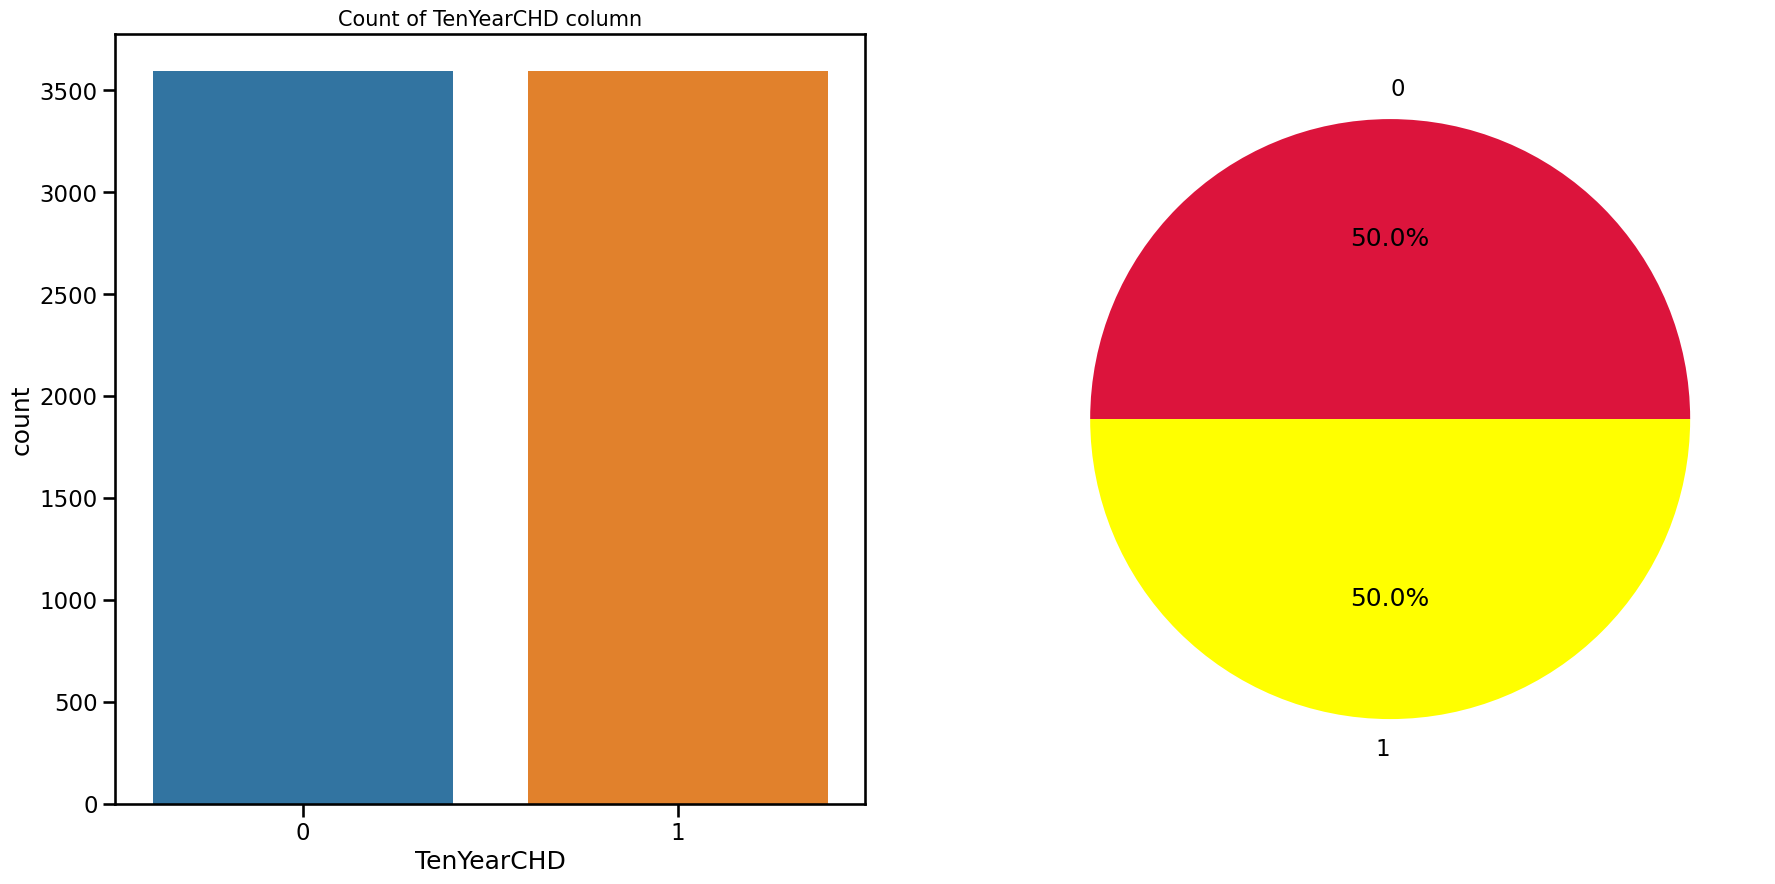

In [64]:
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=df_data)
plt.title("Count of TenYearCHD column", size=15)
plt.subplot(122)
labels=[0,1]
plt.pie(df_data["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["crimson","yellow"])
plt.show()

In [65]:
X = df_data.iloc[:,0:15]  
y = df_data.iloc[:,-1]    
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

featureScores = pd.concat([df_columns,df_scores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(11,'Score'))

            Specs        Score
1             age  8430.084562
9           sysBP  4655.916774
3      cigsPerDay  3682.440590
8         totChol  2638.374544
13        glucose   988.847534
10          diaBP   530.510588
6    prevalentHyp   409.260357
14     TenYearCHD   285.623830
4          BPMeds   169.939164
2   currentSmoker   153.254348
11            BMI    59.512795


In [66]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
1,age,8430.084562
9,sysBP,4655.916774
3,cigsPerDay,3682.440590
8,totChol,2638.374544
13,glucose,988.847534
10,diaBP,530.510588
6,prevalentHyp,409.260357
14,TenYearCHD,285.623830
4,BPMeds,169.939164
2,currentSmoker,153.254348


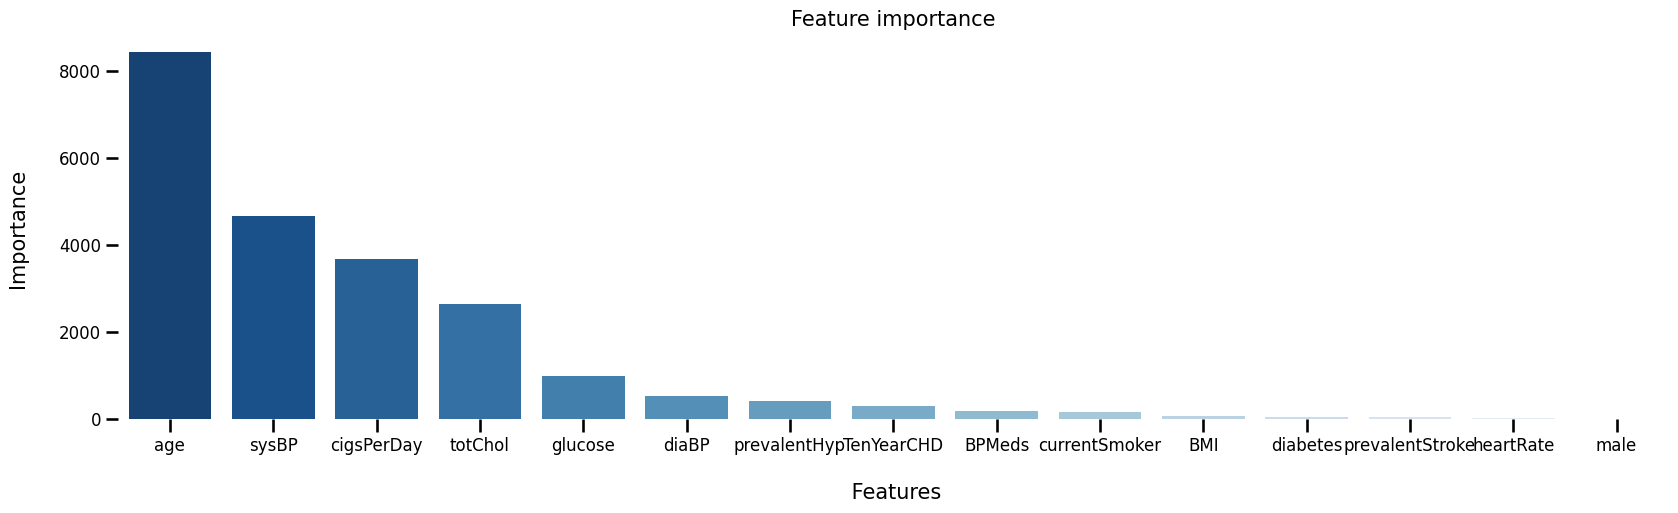

In [67]:
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "Blues_r")
plt.box(False)
plt.title('Feature importance', fontsize=15)
plt.xlabel('\n Features', fontsize=15)
plt.ylabel('Importance \n', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [68]:
df = df_data[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','TenYearCHD', 'currentSmoker' , 'BMI']]
df.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,TenYearCHD,currentSmoker,BMI
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,0,0,26.97
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,0,28.73
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,0,1,25.34
4,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,1,23.10
5,180.0,99.0,43,228.0,0.0,110.0,1,0,0.0,0,0,30.30


In [69]:
scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = pd.DataFrame(scaler.fit_transform(df_data), columns=df_data.columns)
df_scaled.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,enc_hr,encode_age
count,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000
mean,0.466352,0.512024,0.503198,0.137786,0.047275,0.011123,0.394605,0.041157,0.227891,0.254308,0.388771,0.256187,0.326238,0.124833,0.500000,0.466143,0.614641
std,0.498901,0.226353,0.500025,0.175757,0.212241,0.104887,0.488800,0.198667,0.078993,0.119315,0.138500,0.103157,0.121943,0.086780,0.500035,0.170688,0.329394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.315789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.174873,0.171986,0.296296,0.187349,0.242424,0.093220,0.000000,0.500000,0.500000
50%,0.000000,0.500000,1.000000,0.014286,0.000000,0.000000,0.000000,0.000000,0.222411,0.229314,0.370370,0.246486,0.313131,0.107345,0.500000,0.500000,0.500000
75%,1.000000,0.710526,1.000000,0.285714,0.000000,0.000000,1.000000,0.000000,0.273345,0.314421,0.465608,0.312894,0.393939,0.132768,1.000000,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
y = df['TenYearCHD']
X = df.drop(['TenYearCHD'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [71]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print ('Train set:', X_train.shape,  y_train.shape) 
print ('Test set:', X_test.shape,  y_test.shape) 

Train set: (4315, 11) (4315,)
Test set: (2877, 11) (2877,)


In [72]:
clf1 = LogisticRegression(random_state=42)

param_grid = { 
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

model_clf1 = GridSearchCV(estimator=clf1, param_grid=param_grid, cv= 10)
model_clf1.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [73]:
model_clf1.best_params_

{'penalty': 'none', 'solver': 'newton-cg'}

In [74]:
clf1 = LogisticRegression(penalty = 'none', solver = 'newton-cg')
clf1.fit(X_train, y_train)
predictions1 = clf1.predict(X_test)
print(accuracy_score(y_test, predictions1))
print(cross_val_score(clf1, X_train, y_train, cv = 10, scoring = 'accuracy'))

0.6600625651720542
[0.66666667 0.70601852 0.66435185 0.66435185 0.65046296 0.67981439
 0.67517401 0.6612529  0.64733179 0.67517401]


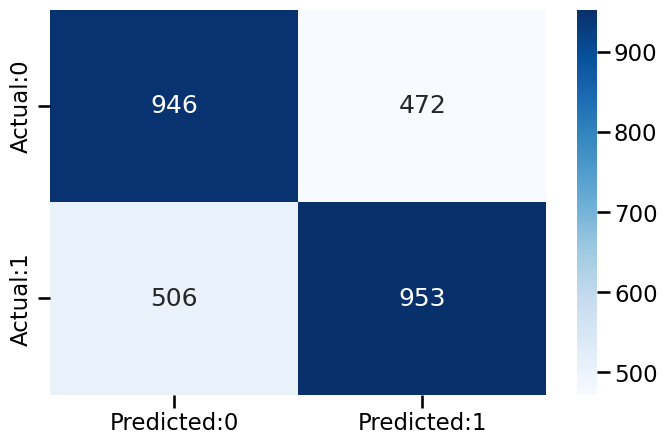

The details for confusion matrix is =


In [75]:
cm = confusion_matrix(y_test, predictions1) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues") 
plt.show() 
  
print('The details for confusion matrix is =') 

In [48]:
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1418
           1       0.67      0.65      0.66      1459

    accuracy                           0.66      2877
   macro avg       0.66      0.66      0.66      2877
weighted avg       0.66      0.66      0.66      2877



In [55]:
# define a new keras model for binary classification
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.layers.core import Dense, Dropout, Activation
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(120, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 120)               1560      
                                                                 
 dropout_4 (Dropout)         (None, 120)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                7744      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,369
Trainable params: 9,369
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
history = binary_model.fit(X_train, y_train, epochs=100, batch_size=150, verbose = 1, validation_data= (X_test,y_test))


Epoch 1/100


ValueError: in user code:

    File "C:\Users\16674\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\16674\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\16674\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\16674\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\16674\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\16674\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 12), found shape=(None, 11)


In [107]:
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(y_test, binary_pred))
print(classification_report(y_test, binary_pred))

90/90 [==============================] - 0s 1ms/step
Results for Binary Model
0.6656239137990962
              precision    recall  f1-score   support

           0       0.67      0.64      0.65      1418
           1       0.66      0.69      0.68      1459

    accuracy                           0.67      2877
   macro avg       0.67      0.67      0.67      2877
weighted avg       0.67      0.67      0.67      2877



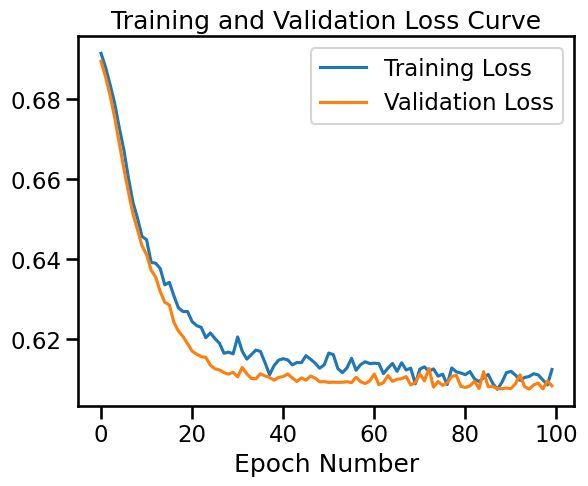

In [108]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
no_epochs = 100
epochs_range=range(no_epochs)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss Curve')
plt.xlabel('Epoch Number')
plt.show()

In [47]:
clf2 = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6, 7, 8, 9, 10],
    'criterion' :['gini', 'entropy']
}

model_clf2 = GridSearchCV(estimator=clf2, param_grid=param_grid, cv= 10)
model_clf2.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
model_clf2.best_params_

In [ ]:
clf2 = RandomForestClassifier(criterion = 'gini', max_depth = 10, max_features = 'auto', n_estimators = 150)
clf2.fit(X_train, y_train)
predictions2 = clf2.predict(X_test)
print(accuracy_score(y_test, predictions2))

In [ ]:
cm = confusion_matrix(y_test, predictions2) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues") 
plt.show() 
  
print('The details for confusion matrix is =') 

In [ ]:
print(classification_report(y_test, predictions2))

In [ ]:
classifier = SVC(random_state=42)

param_grid = { 
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5, 6],
    'gamma' : ['scale', 'auto']
}

gscv_clf = GridSearchCV(estimator=classifier, param_grid=param_grid, cv= 10)
gscv_clf.fit(X_train, y_train)

In [ ]:
gscv_clf.best_params_

In [ ]:
clf = SVC(degree = 2, gamma = 'scale', kernel= 'poly')
print(cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy'))

In [ ]:
#Evaluation And Accuracy
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_acc_score = accuracy_score(y_test, knn_predict)

from sklearn.metrics import jaccard_score 
print('Accuracy of the model in jaccard similarity score is = ',  
      jaccard_score(y_test, knn_predict))

In [ ]:
gscv_clf.best_params_

In [ ]:
clf = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'auto', n_estimators = 200)
print(cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy'))

In [ ]:
# Modules for Balancing the Train Dataset
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto', k_neighbors=9, random_state=100)
X, y = sm.fit_resample(X, y) 

In [ ]:
clf_svc = SVC(degree = 2, gamma = 'scale', kernel= 'poly')
clf_svc.fit(X_train, y_train)
X_test = std_scaler.transform(X_test)
predictions2 = clf_svc.predict(X_test)
print(accuracy_score(y_test, predictions2))

In [ ]:
print(classification_report(y_test, predictions2))

In [ ]:
print(confusion_matrix(y_test, predictions2))

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(clf, X_train, y_train,random_state=0, n_repeats = 30)